In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from sklearn import datasets
# github 地址：https://github.com/paskhaver/pandas-in-action

## 一、Introducing Pandas

In [3]:
iris = datasets.load_iris()  #导入鸢尾花数据集
pd.set_option('display.max_rows',10) # 全局设置显示的行数
data = pd.DataFrame(iris.data,columns=iris.feature_names)
data

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

In [4]:
# 对值进行排序
data.sort_values(by='petal width (cm)',ascending=False) #降序排列

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
100                6.3               3.3                6.0               2.5
109                7.2               3.6                6.1               2.5
144                6.7               3.3                5.7               2.5
114                5.8               2.8                5.1               2.4
140                6.7               3.1                5.6               2.4
..                 ...               ...                ...               ...
12                 4.8               3.0                1.4               0.1
13                 4.3               3.0                1.1               0.1
37                 4.9               3.6                1.4               0.1
32                 5.2               4.1                1.5               0.1
9                  4.9               3.1                1.5               0.1

[150 rows x 4 columns]

In [5]:
data

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]

+ ## 选择行

In [6]:
data.iloc[[0]] # 返回一行，如果不把0放在列表中，返回的是一个Series

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2

In [7]:
data.loc[[0]] #同样返回一行，但是这里的0是作为标签使用的

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2

+ ## 选择列

In [8]:
data[['petal width (cm)']] #如果列名没有空格，也是可以使用点语法的

petal width (cm)
0                 0.2
1                 0.2
2                 0.2
3                 0.2
4                 0.2
..                ...
145               2.3
146               1.9
147               2.0
148               2.3
149               1.8

[150 rows x 1 columns]

+ ## Counting Values in a Series

In [9]:
data['petal width (cm)'].value_counts().head()

0.2    29
1.3    13
1.5    12
1.8    12
1.4     8
Name: petal width (cm), dtype: int64

+ ## 根据列进行过滤

In [10]:
data[data['petal width (cm)'] == 1.4] # 返回所有petal width 为1.4的行

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
50                 7.0               3.2                4.7               1.4
59                 5.2               2.7                3.9               1.4
63                 6.1               2.9                4.7               1.4
65                 6.7               3.1                4.4               1.4
75                 6.6               3.0                4.4               1.4
76                 6.8               2.8                4.8               1.4
91                 6.1               3.0                4.6               1.4
134                6.1               2.6                5.6               1.4

In [11]:
data[(data['petal width (cm)'] == 1.4) & (data['petal length (cm)'] == 4.4)] 
# 使用 & (逻辑且) 连接两个条件，类似的 | 表示逻辑或，~ 表示逻辑非

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
65                6.7               3.1                4.4               1.4
75                6.6               3.0                4.4               1.4

In [12]:
# 使用between 过滤出一个范围
data[data['petal width (cm)'].between(1,2)] # 将petal width 在1和2之间的行返回

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
50                 7.0               3.2                4.7               1.4
51                 6.4               3.2                4.5               1.5
52                 6.9               3.1                4.9               1.5
53                 5.5               2.3                4.0               1.3
54                 6.5               2.8                4.6               1.5
..                 ...               ...                ...               ...
138                6.0               3.0                4.8               1.8
142                5.8               2.7                5.1               1.9
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
149                5.9               3.0                5.1               1.8

[77 rows x 4 columns]

+ ## 字符串的帮助函数 str（或者叫数据访问器）
+ 类似的还有dt（日期时间）和cat(分类)

In [13]:
# 添加了一行labels
data['labels'] = iris.target
data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   labels  
0       0  
1       0  
2       0  
3       0  
4       0

In [14]:
# 将labels中的数字替换成字符串
data['labels'] = data['labels'].apply(lambda x:iris.target_names[x])
data

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

        labels  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica  

[150 rows x 5 columns]

In [15]:
data['labels'].str.upper().head() # 使用字符串中的功能

0    SETOSA
1    SETOSA
2    SETOSA
3    SETOSA
4    SETOSA
Name: labels, dtype: object

In [16]:
# labels 中的字符串作为过滤条件
data[data['labels'].str.contains('sa')]

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                 5.1               3.5                1.4               0.2   
1                 4.9               3.0                1.4               0.2   
2                 4.7               3.2                1.3               0.2   
3                 4.6               3.1                1.5               0.2   
4                 5.0               3.6                1.4               0.2   
..                ...               ...                ...               ...   
45                4.8               3.0                1.4               0.3   
46                5.1               3.8                1.6               0.2   
47                4.6               3.2                1.4               0.2   
48                5.3               3.7                1.5               0.2   
49                5.0               3.3                1.4               0.2   

    labels  
0   setosa  
1   setosa  
2   setosa  
3   setosa  
4   setosa  
..     ...  
45  setosa  
46  setosa  
47  setosa  
48  setosa  
49  setosa  

[50 rows x 5 columns]

+ ## Grouping Data(聚合数据)

In [17]:
movies = pd.read_csv('../input/pandasinaction/Chapter 01 - Introducing Pandas/movies.csv')
movies.head()

Rank                         Title       Studio       Gross  Year
0     1             Avengers: Endgame  Buena Vista  $2,796.30   2019
1     2                        Avatar          Fox  $2,789.70   2009
2     3                       Titanic    Paramount  $2,187.50   1997
3     4  Star Wars: The Force Awakens  Buena Vista  $2,068.20   2015
4     5        Avengers: Infinity War  Buena Vista  $2,048.40   2018

In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rank    782 non-null    int64 
 1   Title   782 non-null    object
 2   Studio  782 non-null    object
 3   Gross   782 non-null    object
 4   Year    782 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 30.7+ KB


In [19]:
# Gross这一列的数据类型是字符串，而不是数字，接下来处理该列数据
# 将数据中的美元符号和逗号移除,然后再转化成数字
movies['Gross'].str.replace('$','',regex=True).str.replace(',','',regex = True).astype(np.float)

0      2796.3
1      2789.7
2      2187.5
3      2068.2
4      2048.4
        ...  
777     201.6
778     200.8
779     200.7
780     200.5
781     200.3
Name: Gross, Length: 782, dtype: float64

In [20]:
movies['Gross'] = movies['Gross'].str.replace('$','',regex=True).str.replace(',','',regex = True).astype(np.float)
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rank    782 non-null    int64  
 1   Title   782 non-null    object 
 2   Studio  782 non-null    object 
 3   Gross   782 non-null    float64
 4   Year    782 non-null    int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 30.7+ KB


In [21]:
movies.head()

Rank                         Title       Studio   Gross  Year
0     1             Avengers: Endgame  Buena Vista  2796.3  2019
1     2                        Avatar          Fox  2789.7  2009
2     3                       Titanic    Paramount  2187.5  1997
3     4  Star Wars: The Force Awakens  Buena Vista  2068.2  2015
4     5        Avengers: Infinity War  Buena Vista  2048.4  2018

In [22]:
movies['Gross'].mean() #均值

439.0308184143226

In [23]:
# 分组求均值
movies.groupby('Studio')['Gross'].mean()

Studio
Artisan                   248.600000
Buena Vista               588.680000
CL                        228.100000
China Film Corporation    699.800000
Columbia                  255.320000
                             ...    
Universal                 406.443119
Vestron                   214.600000
WGUSA                     337.275000
Warner Brothers           444.271212
Weinstein                 342.950000
Name: Gross, Length: 37, dtype: float64

# 二、The Series Object

In [24]:
# 使用列表创建Series
ice_cream_flavors = ["Chocolate", "Vanilla","Strawberry", "Rum Raisin"]

pd.Series(ice_cream_flavors)

0     Chocolate
1       Vanilla
2    Strawberry
3    Rum Raisin
dtype: object

In [25]:
pd.Series(ice_cream_flavors).values #获取Series的值

array(['Chocolate', 'Vanilla', 'Strawberry', 'Rum Raisin'], dtype=object)

In [26]:
pd.Series(ice_cream_flavors).index.tolist() #获取Series的索引

[0, 1, 2, 3]

In [27]:
s1 = pd.Series(data = ice_cream_flavors,index = list('ABCD'),name='flavors')
s2 = pd.Series(data = ice_cream_flavors,index = list('ABCD'),name='flavors2')
s1

A     Chocolate
B       Vanilla
C    Strawberry
D    Rum Raisin
Name: flavors, dtype: object

In [28]:
pd.concat([s1,s2],axis=1) # 当连接两个Series的时候，创建Series时使用的name参数将会被作为列名

flavors    flavors2
A   Chocolate   Chocolate
B     Vanilla     Vanilla
C  Strawberry  Strawberry
D  Rum Raisin  Rum Raisin

In [29]:
# 使用字典创建Series,字典的键将会被作为索引
calorie_info = {
"Cereal": 125,
"Chocolate Bar": 406,
"Ice Cream Sundae": 342
}
pd.Series(calorie_info) 

Cereal              125
Chocolate Bar       406
Ice Cream Sundae    342
dtype: int64

In [30]:
pd.Series(data = [3, 3]).is_unique # 数据是否唯一

False

In [31]:
pd.Series(data = [1, 3, 3, 5]).is_monotonic_decreasing #数据是否递减

False

In [32]:
pd.Series(data = [1, 3, 3, 5]).is_monotonic_increasing # 数据是否递增

True

In [33]:
# 获取前几行和后几行
pd.Series(data = range(1,10)).head()

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [34]:
pd.Series(data = range(1,10)).tail()

4    5
5    6
6    7
7    8
8    9
dtype: int64

In [35]:
pd.Series(data = range(1,10)).sum(skipna=True) # 累加

45

In [36]:
pd.Series(data = range(1,10)).product(skipna=True) #累乘

362880

In [37]:
pd.Series(data = range(1,10)).cumsum() # 滚动累加：前一项的和，前两项的和，前三项的和，....

0     1
1     3
2     6
3    10
4    15
5    21
6    28
7    36
8    45
dtype: int64

In [38]:
pd.Series(data = range(1,10)).cumprod() #关东累乘

0         1
1         2
2         6
3        24
4       120
5       720
6      5040
7     40320
8    362880
dtype: int64

In [39]:

pd.Series(data = range(1,10),index=range(1,10)).pct_change() # 没两项之间的变化率

1         NaN
2    1.000000
3    0.500000
4    0.333333
5    0.250000
6    0.200000
7    0.166667
8    0.142857
9    0.125000
dtype: float64

In [40]:
# 显示Series的所有统计信息
pd.Series(data = range(1,10)).describe()

count    9.000000
mean     5.000000
std      2.738613
min      1.000000
25%      3.000000
50%      5.000000
75%      7.000000
max      9.000000
dtype: float64

In [41]:
pd.Series(data = range(1,10)).sample(3) #随机取样

5    6
3    4
1    2
dtype: int64

In [42]:
pd.Series(data = np.random.randint(5,10,10)).unique() # 去重返回

array([9, 5, 6, 7, 8])

# 三、Series Methods

In [43]:
pokemon = pd.read_csv('../input/pandasinaction/Chapter 03 - Series Methods/pokemon.csv') #读取宝可梦数据
pokemon.head()

Pokemon            Type
0   Bulbasaur  Grass / Poison
1     Ivysaur  Grass / Poison
2    Venusaur  Grass / Poison
3  Charmander            Fire
4  Charmeleon            Fire

In [44]:
pokemon.shape

(809, 2)

In [45]:
pokemon = pd.read_csv("../input/pandasinaction/Chapter 03 - Series Methods/pokemon.csv"
                      , index_col = "Pokemon"
                      , squeeze = True) # 强制读取到Series中
pokemon

Pokemon
Bulbasaur      Grass / Poison
Ivysaur        Grass / Poison
Venusaur       Grass / Poison
Charmander               Fire
Charmeleon               Fire
                    ...      
Stakataka        Rock / Steel
Blacephalon      Fire / Ghost
Zeraora              Electric
Meltan                  Steel
Melmetal                Steel
Name: Type, Length: 809, dtype: object

In [46]:
pokemon.hasnans  # 检查数据中是否含有空值  NaN

False

In [47]:
pokemon.index.hasnans

False

In [48]:
pokemon.index.has_duplicates # 查看索引是否有重复的

False

In [49]:
google = pd.read_csv('../input/pandasinaction/Chapter 03 - Series Methods/google_stocks.csv'
                    ,index_col='Date' # 指定索引列
                    ,parse_dates=['Date'] # 解析时间
                    ,squeeze=True) # 强制转化成Series
google.head()

Date
2004-08-19    49.98
2004-08-20    53.95
2004-08-23    54.50
2004-08-24    52.24
2004-08-25    52.80
Name: Close, dtype: float64

In [50]:
pd.read_csv("../input/pandasinaction/Chapter 03 - Series Methods/revolutionary_war.csv")

Battle  Start Date          State
0                         Powder Alarm    9/1/1774  Massachusetts
1    Storming of Fort William and Mary  12/14/1774  New Hampshire
2     Battles of Lexington and Concord   4/19/1775  Massachusetts
3                      Siege of Boston   4/19/1775  Massachusetts
4                   Gunpowder Incident   4/20/1775       Virginia
..                                 ...         ...            ...
227                Siege of Fort Henry   9/11/1782       Virginia
228         Grand Assault on Gibraltar   9/13/1782            NaN
229          Action of 18 October 1782  10/18/1782            NaN
230          Action of 6 December 1782   12/6/1782            NaN
231          Action of 22 January 1783   1/22/1783       Virginia

[232 rows x 3 columns]

In [51]:
battles = pd.read_csv("../input/pandasinaction/Chapter 03 - Series Methods/revolutionary_war.csv",
                        index_col = "Start Date",
                        parse_dates = ["Start Date"],
                        usecols = ["State", "Start Date"], #只使用两列数据
                        squeeze = True)
battles.head()

Start Date
1774-09-01    Massachusetts
1774-12-14    New Hampshire
1775-04-19    Massachusetts
1775-04-19    Massachusetts
1775-04-20         Virginia
Name: State, dtype: object

+ ## 对Series进行排序
+ Series的索引和值都可以进行排序

In [52]:
google.sort_values(ascending= True)

Date
2004-09-03      49.82
2004-09-01      49.94
2004-08-19      49.98
2004-09-02      50.57
2004-09-07      50.60
               ...   
2019-04-23    1264.55
2019-10-25    1265.13
2018-07-26    1268.33
2019-04-26    1272.18
2019-04-29    1287.58
Name: Close, Length: 3824, dtype: float64

In [53]:
battles.sort_values() # NaN 会默认排在最后

Start Date
1781-09-06    Connecticut
1779-07-05    Connecticut
1777-04-27    Connecticut
1777-09-03       Delaware
1777-05-17        Florida
                 ...     
1782-08-08            NaN
1782-08-25            NaN
1782-09-13            NaN
1782-10-18            NaN
1782-12-06            NaN
Name: State, Length: 232, dtype: object

In [54]:
battles.sort_values(na_position='first') # NaN 排在最前

Start Date
1775-09-17         NaN
1775-12-31         NaN
1776-03-03         NaN
1776-03-25         NaN
1776-05-18         NaN
                ...   
1781-07-06    Virginia
1781-07-01    Virginia
1781-06-26    Virginia
1781-04-25    Virginia
1783-01-22    Virginia
Name: State, Length: 232, dtype: object

In [55]:
battles.dropna().sort_values() # 删除掉空值后再排序

Start Date
1781-09-06    Connecticut
1779-07-05    Connecticut
1777-04-27    Connecticut
1777-09-03       Delaware
1777-05-17        Florida
                 ...     
1781-07-06       Virginia
1781-07-01       Virginia
1781-06-26       Virginia
1781-04-25       Virginia
1783-01-22       Virginia
Name: State, Length: 162, dtype: object

In [56]:
# 排序索引
pokemon.sort_index()

Pokemon
Abomasnow        Grass / Ice
Abra                 Psychic
Absol                   Dark
Accelgor                 Bug
Aegislash      Steel / Ghost
                  ...       
Zoroark                 Dark
Zorua                   Dark
Zubat        Poison / Flying
Zweilous       Dark / Dragon
Zygarde      Dragon / Ground
Name: Type, Length: 809, dtype: object

In [57]:
# 返回最大的5个数
google.nlargest(n = 5)

Date
2019-04-29    1287.58
2019-04-26    1272.18
2018-07-26    1268.33
2019-10-25    1265.13
2019-04-23    1264.55
Name: Close, dtype: float64

In [58]:
google.nsmallest(n = 6) #返回最小的几个值

Date
2004-09-03    49.82
2004-09-01    49.94
2004-08-19    49.98
2004-09-02    50.57
2004-09-07    50.60
2004-08-30    50.81
Name: Close, dtype: float64

In [59]:
battles.sort_values(inplace=True) #原地修改

In [60]:
battles.head()

Start Date
1781-09-06    Connecticut
1779-07-05    Connecticut
1777-04-27    Connecticut
1777-09-03       Delaware
1777-05-17        Florida
Name: State, dtype: object

+ ## 统计数值

In [61]:
pokemon.value_counts() # 统计值的数量

Normal             65
Water              61
Grass              38
Psychic            35
Fire               30
                   ..
Normal / Dragon     1
Psychic / Grass     1
Fire / Water        1
Ice / Ghost         1
Psychic / Fire      1
Name: Type, Length: 159, dtype: int64

In [62]:
pokemon.value_counts(normalize=True) # 返回每个唯一值出现的频率

Normal             0.080346
Water              0.075402
Grass              0.046972
Psychic            0.043263
Fire               0.037083
                     ...   
Normal / Dragon    0.001236
Psychic / Grass    0.001236
Fire / Water       0.001236
Ice / Ghost        0.001236
Psychic / Fire     0.001236
Name: Type, Length: 159, dtype: float64

In [63]:
(pokemon.value_counts(normalize=True) * 100).round(2) # 返回每个唯一值出现的频率的百分比

Normal             8.03
Water              7.54
Grass              4.70
Psychic            4.33
Fire               3.71
                   ... 
Normal / Dragon    0.12
Psychic / Grass    0.12
Fire / Water       0.12
Ice / Ghost        0.12
Psychic / Fire     0.12
Name: Type, Length: 159, dtype: float64

In [64]:
bins = [0, 200, 400, 600, 800, 1000, 1200, 1400]
google.value_counts(bins = bins) # 分箱，默认值是按照降序排列的

(200.0, 400.0]      1568
(-0.001, 200.0]      595
(400.0, 600.0]       575
(1000.0, 1200.0]     406
(600.0, 800.0]       380
(800.0, 1000.0]      207
(1200.0, 1400.0]      93
Name: Close, dtype: int64

In [65]:
google.value_counts(bins = bins,sort=False) # 不排序

(-0.001, 200.0]      595
(200.0, 400.0]      1568
(400.0, 600.0]       575
(600.0, 800.0]       380
(800.0, 1000.0]      207
(1000.0, 1200.0]     406
(1200.0, 1400.0]      93
Name: Close, dtype: int64

In [66]:
google.value_counts(bins = bins).sort_index() #也可以值排序后再排序索引

(-0.001, 200.0]      595
(200.0, 400.0]      1568
(400.0, 600.0]       575
(600.0, 800.0]       380
(800.0, 1000.0]      207
(1000.0, 1200.0]     406
(1200.0, 1400.0]      93
Name: Close, dtype: int64

In [67]:
# 对索引同样可以进行值统计

battles.index

DatetimeIndex(['1781-09-06', '1779-07-05', '1777-04-27', '1777-09-03',
               '1777-05-17', '1779-09-10', '1779-09-07', '1780-03-02',
               '1778-06-30', '1781-01-07',
               ...
               '1782-05-06', '1782-05-25', '1782-05-28', '1782-07-01',
               '1782-07-06', '1782-08-08', '1782-08-25', '1782-09-13',
               '1782-10-18', '1782-12-06'],
              dtype='datetime64[ns]', name='Start Date', length=232, freq=None)

In [68]:
battles.index.value_counts()

1782-01-11    2
1778-09-07    2
1780-05-25    2
1782-03-16    2
1781-09-13    2
             ..
1776-03-25    1
1782-08-08    1
1775-04-20    1
1776-10-11    1
1780-03-02    1
Name: Start Date, Length: 217, dtype: int64

### apply方法，将一个函数作用到Series中的每个值上

In [69]:
google.head()

Date
2004-08-19    49.98
2004-08-20    53.95
2004-08-23    54.50
2004-08-24    52.24
2004-08-25    52.80
Name: Close, dtype: float64

In [70]:
google.apply(round) # 应用一个四舍五入函数

Date
2004-08-19      50
2004-08-20      54
2004-08-23      54
2004-08-24      52
2004-08-25      53
              ... 
2019-10-21    1246
2019-10-22    1243
2019-10-23    1259
2019-10-24    1261
2019-10-25    1265
Name: Close, Length: 3824, dtype: int64

In [71]:
pokemon.head()

Pokemon
Bulbasaur     Grass / Poison
Ivysaur       Grass / Poison
Venusaur      Grass / Poison
Charmander              Fire
Charmeleon              Fire
Name: Type, dtype: object

In [72]:
pokemon.apply(lambda x:'/' in x).map({True:'Multi',False:'Single'}) # 应用自定义函数，并使用map方法

Pokemon
Bulbasaur       Multi
Ivysaur         Multi
Venusaur        Multi
Charmander     Single
Charmeleon     Single
                ...  
Stakataka       Multi
Blacephalon     Multi
Zeraora        Single
Meltan         Single
Melmetal       Single
Name: Type, Length: 809, dtype: object

In [73]:
pokemon.apply(lambda x:np.where('/' in x,'Multi','Single')) # 也可以使用np.where方法，类似于C++中的三元运算符

Pokemon
Bulbasaur       Multi
Ivysaur         Multi
Venusaur        Multi
Charmander     Single
Charmeleon     Single
                ...  
Stakataka       Multi
Blacephalon     Multi
Zeraora        Single
Meltan         Single
Melmetal       Single
Name: Type, Length: 809, dtype: object

In [74]:
pokemon.apply(lambda x:np.where('/' in x,'Multi','Single')).value_counts()

Multi     405
Single    404
Name: Type, dtype: int64

## Coding Challenge:
+ Our goal is
to find out which day of the week saw the most battles during the Revolutionary War. The final
output should be a Series with the days of the week (i.e. Sunday, Monday) as index labels and a
count of battles on each day as the values. 

In [75]:
wars = pd.read_csv('../input/pandasinaction/Chapter 03 - Series Methods/revolutionary_war.csv'
                  ,index_col='Start Date'
                   ,squeeze= True
                   ,usecols=['Start Date','Battle']
                   ,parse_dates=['Start Date']
                  )
wars.head()

Start Date
1774-09-01                         Powder Alarm
1774-12-14    Storming of Fort William and Mary
1775-04-19     Battles of Lexington and Concord
1775-04-19                      Siege of Boston
1775-04-20                   Gunpowder Incident
Name: Battle, dtype: object

In [76]:
wars.shape

(232,)

In [77]:
wars.index.is_unique  # 索引有重复值

False

In [78]:
wars.index # 索引时datetime格式

DatetimeIndex(['1774-09-01', '1774-12-14', '1775-04-19', '1775-04-19',
               '1775-04-20', '1775-05-10', '1775-05-27', '1775-06-11',
               '1775-06-17', '1775-08-08',
               ...
               '1782-08-08', '1782-08-15', '1782-08-19', '1782-08-26',
               '1782-08-25', '1782-09-11', '1782-09-13', '1782-10-18',
               '1782-12-06', '1783-01-22'],
              dtype='datetime64[ns]', name='Start Date', length=232, freq=None)

In [79]:
wars.index.to_series() # 将索引转成Series

Start Date
1774-09-01   1774-09-01
1774-12-14   1774-12-14
1775-04-19   1775-04-19
1775-04-19   1775-04-19
1775-04-20   1775-04-20
                ...    
1782-09-11   1782-09-11
1782-09-13   1782-09-13
1782-10-18   1782-10-18
1782-12-06   1782-12-06
1783-01-22   1783-01-22
Name: Start Date, Length: 232, dtype: datetime64[ns]

In [80]:
wars.index.to_series().isnull().sum() # 查看空值

4

In [81]:
wars.index.to_series().dropna().dt.day_name() # 返回每一天是周几

Start Date
1774-09-01     Thursday
1774-12-14    Wednesday
1775-04-19    Wednesday
1775-04-19    Wednesday
1775-04-20     Thursday
                ...    
1782-09-11    Wednesday
1782-09-13       Friday
1782-10-18       Friday
1782-12-06       Friday
1783-01-22    Wednesday
Name: Start Date, Length: 228, dtype: object

In [82]:
wars.index.to_series().dropna().dt.day_name().value_counts()

Friday       39
Saturday     39
Wednesday    32
Sunday       31
Thursday     31
Tuesday      29
Monday       27
Name: Start Date, dtype: int64

# 四、The DataFrame Object

In [83]:
# 创建一个DataFrame

city_data = {
"City": ["New York City", "Paris", "Barcelona", "Rome"],
"Country": ["United States", "France", "Spain", "Italy"],
"Population": [8600000, 2141000, 5515000, 2873000]
}

cities = pd.DataFrame(data=city_data)
cities.head()

City        Country  Population
0  New York City  United States     8600000
1          Paris         France     2141000
2      Barcelona          Spain     5515000
3           Rome          Italy     2873000

In [84]:
cities.T.head() # 转置

0        1          2        3
City        New York City    Paris  Barcelona     Rome
Country     United States   France      Spain    Italy
Population        8600000  2141000    5515000  2873000

In [85]:
# 从numpy N 维数组创建DataFrame

pd.DataFrame(data = np.array([[25, 22, 80, 43, 42],
                              [40, 89, 7, 21, 25],
                              [89, 71, 32, 28, 39]])
             ,index = ["Morning", "Afternoon", "Evening"]
             ,columns = ("Monday", "Tuesday", "Wednesday", "Thursday", "Friday")
            )

Monday  Tuesday  Wednesday  Thursday  Friday
Morning        25       22         80        43      42
Afternoon      40       89          7        21      25
Evening        89       71         32        28      39

In [86]:
# 读取csv文件
nba = pd.read_csv('../input/pandasinaction/Chapter 04 - The DataFrame Object/nba.csv'
           ,parse_dates=['Birthday']
           )
nba.head()

Name                Team Position   Birthday   Salary
0    Shake Milton  Philadelphia 76ers       SG 1996-09-26  1445697
1  Christian Wood     Detroit Pistons       PF 1995-09-27  1645357
2   PJ Washington   Charlotte Hornets       PF 1998-08-23  3831840
3    Derrick Rose     Detroit Pistons       PG 1988-10-04  7317074
4   Marial Shayok  Philadelphia 76ers        G 1995-07-26    79568

In [87]:
nba.dtypes.to_frame() # 返回每一类的类型

0
Name              object
Team              object
Position          object
Birthday  datetime64[ns]
Salary             int64

In [88]:
nba.index #索引

RangeIndex(start=0, stop=450, step=1)

In [89]:
nba.columns # 列名

Index(['Name', 'Team', 'Position', 'Birthday', 'Salary'], dtype='object')

In [90]:
nba.values  # 值，返回一个np array

array([['Shake Milton', 'Philadelphia 76ers', 'SG',
        Timestamp('1996-09-26 00:00:00'), 1445697],
       ['Christian Wood', 'Detroit Pistons', 'PF',
        Timestamp('1995-09-27 00:00:00'), 1645357],
       ['PJ Washington', 'Charlotte Hornets', 'PF',
        Timestamp('1998-08-23 00:00:00'), 3831840],
       ...,
       ['Robin Lopez', 'Milwaukee Bucks', 'C',
        Timestamp('1988-04-01 00:00:00'), 4767000],
       ['Collin Sexton', 'Cleveland Cavaliers', 'PG',
        Timestamp('1999-01-04 00:00:00'), 4764960],
       ['Ricky Rubio', 'Phoenix Suns', 'PG',
        Timestamp('1990-10-21 00:00:00'), 16200000]], dtype=object)

In [91]:
nba.count() #数量

Name        450
Team        450
Position    450
Birthday    450
Salary      450
dtype: int64

In [92]:
nba.nunique() # 唯一性值的数量

Name        450
Team         30
Position      9
Birthday    430
Salary      269
dtype: int64

In [93]:
nba.isnull().sum(axis = 0) # 没有空值

Name        0
Team        0
Position    0
Birthday    0
Salary      0
dtype: int64

In [94]:
nba.max() # 默认返回每一列的最大值

Name             Zylan Cheatham
Team         Washington Wizards
Position                     SG
Birthday    2000-12-23 00:00:00
Salary                 40231758
dtype: object

In [95]:
nba.nlargest(4,columns=['Salary']) # 指定那一列为参照

Name                   Team Position   Birthday    Salary
205      Stephen Curry  Golden State Warriors       PG 1988-03-14  40231758
38          Chris Paul  Oklahoma City Thunder       PG 1985-05-06  38506482
219  Russell Westbrook        Houston Rockets       PG 1988-11-12  38506482
251          John Wall     Washington Wizards       PG 1990-09-06  38199000

In [96]:
nba.sum(numeric_only=True) #仅仅累加数值型的列

Salary    3444112694
dtype: int64

In [97]:
nba.mean(numeric_only=True)

Salary    7.653584e+06
dtype: float64

In [98]:
nba.head()

Name                Team Position   Birthday   Salary
0    Shake Milton  Philadelphia 76ers       SG 1996-09-26  1445697
1  Christian Wood     Detroit Pistons       PF 1995-09-27  1645357
2   PJ Washington   Charlotte Hornets       PF 1998-08-23  3831840
3    Derrick Rose     Detroit Pistons       PG 1988-10-04  7317074
4   Marial Shayok  Philadelphia 76ers        G 1995-07-26    79568

In [99]:
# 按照某一列进行按值排序

nba.sort_values(by='Salary',ascending=False).head()

Name                   Team Position   Birthday    Salary
205      Stephen Curry  Golden State Warriors       PG 1988-03-14  40231758
219  Russell Westbrook        Houston Rockets       PG 1988-11-12  38506482
38          Chris Paul  Oklahoma City Thunder       PG 1985-05-06  38506482
251          John Wall     Washington Wizards       PG 1990-09-06  38199000
264       James Harden        Houston Rockets       PG 1989-08-26  38199000

In [100]:
# 按行索引进行排序
nba.sort_index(axis=0,ascending=False).head() #默认axis为0

Name                 Team Position   Birthday    Salary
449    Ricky Rubio         Phoenix Suns       PG 1990-10-21  16200000
448  Collin Sexton  Cleveland Cavaliers       PG 1999-01-04   4764960
447    Robin Lopez      Milwaukee Bucks        C 1988-04-01   4767000
446    Harry Giles     Sacramento Kings       PF 1998-04-22   2578800
445  Austin Rivers      Houston Rockets       PG 1992-08-01   2174310

In [101]:
nba.sort_index(axis=1).head()

Birthday            Name Position   Salary                Team
0 1996-09-26    Shake Milton       SG  1445697  Philadelphia 76ers
1 1995-09-27  Christian Wood       PF  1645357     Detroit Pistons
2 1998-08-23   PJ Washington       PF  3831840   Charlotte Hornets
3 1988-10-04    Derrick Rose       PG  7317074     Detroit Pistons
4 1995-07-26   Marial Shayok        G    79568  Philadelphia 76ers

In [102]:
# 设置新的索引

nba.set_index(keys='Name').head()

Team Position   Birthday   Salary
Name                                                           
Shake Milton    Philadelphia 76ers       SG 1996-09-26  1445697
Christian Wood     Detroit Pistons       PF 1995-09-27  1645357
PJ Washington    Charlotte Hornets       PF 1998-08-23  3831840
Derrick Rose       Detroit Pistons       PG 1988-10-04  7317074
Marial Shayok   Philadelphia 76ers        G 1995-07-26    79568

In [103]:
# 选择单独的一列

nba.Name.to_frame().head()

Name
0    Shake Milton
1  Christian Wood
2   PJ Washington
3    Derrick Rose
4   Marial Shayok

In [104]:
# 或者
nba['Name'].to_frame().head()

Name
0    Shake Milton
1  Christian Wood
2   PJ Washington
3    Derrick Rose
4   Marial Shayok

In [105]:
# 选择多列

nba[['Name','Salary']]

Name    Salary
0      Shake Milton   1445697
1    Christian Wood   1645357
2     PJ Washington   3831840
3      Derrick Rose   7317074
4     Marial Shayok     79568
..              ...       ...
445   Austin Rivers   2174310
446     Harry Giles   2578800
447     Robin Lopez   4767000
448   Collin Sexton   4764960
449     Ricky Rubio  16200000

[450 rows x 2 columns]

In [106]:
# 选择指定类型的类

nba.select_dtypes(include='object').head()

Name                Team Position
0    Shake Milton  Philadelphia 76ers       SG
1  Christian Wood     Detroit Pistons       PF
2   PJ Washington   Charlotte Hornets       PF
3    Derrick Rose     Detroit Pistons       PG
4   Marial Shayok  Philadelphia 76ers        G

In [107]:
# 排除字符串和整数的列
nba.select_dtypes(exclude = ["object", "int"]).head()

Birthday
0 1996-09-26
1 1995-09-27
2 1998-08-23
3 1988-10-04
4 1995-07-26

In [108]:
nba.head()

Name                Team Position   Birthday   Salary
0    Shake Milton  Philadelphia 76ers       SG 1996-09-26  1445697
1  Christian Wood     Detroit Pistons       PF 1995-09-27  1645357
2   PJ Washington   Charlotte Hornets       PF 1998-08-23  3831840
3    Derrick Rose     Detroit Pistons       PG 1988-10-04  7317074
4   Marial Shayok  Philadelphia 76ers        G 1995-07-26    79568

In [109]:
nba.set_index(keys='Name',inplace=True)

In [110]:
# 选择一行  The loc attribute accepts the label of a row to extract.

nba.loc['Shake Milton']

Team         Philadelphia 76ers
Position                     SG
Birthday    1996-09-26 00:00:00
Salary                  1445697
Name: Shake Milton, dtype: object

In [111]:
# 选择多行

nba.loc[['Shake Milton','Derrick Rose']]

Team Position   Birthday   Salary
Name                                                         
Shake Milton  Philadelphia 76ers       SG 1996-09-26  1445697
Derrick Rose     Detroit Pistons       PG 1988-10-04  7317074

In [112]:
# 切片选择多行

nba.sort_index().loc["Otto Porter":"Patrick Beverley"]

Team Position   Birthday    Salary
Name                                                                
Otto Porter              Chicago Bulls       SF 1993-06-03  27250576
PJ Dozier               Denver Nuggets       PG 1996-10-25     79568
PJ Washington        Charlotte Hornets       PF 1998-08-23   3831840
Pascal Siakam          Toronto Raptors       PF 1994-04-02   2351838
Pat Connaughton        Milwaukee Bucks       SG 1993-01-06   1723050
Patrick Beverley  Los Angeles Clippers       PG 1988-07-12  12345680

In [113]:
# 布尔索引选择多行

nba.sort_index().loc[nba.Position == 'SG'].head()

Team Position   Birthday    Salary
Name                                                                    
Alec Burks           Golden State Warriors       SG 1991-07-20   2320044
Allen Crabbe                 Atlanta Hawks       SG 1992-04-09  18500000
Anfernee Simons     Portland Trail Blazers       SG 1999-06-08   2149560
Antonius Cleveland        Dallas Mavericks       SG 1994-02-02     79568
Ben McLemore               Houston Rockets       SG 1993-02-11   2028594

In [114]:
# 通过索引位置获取行 The iloc (index location) attribute extracts one or more rows by index position.

nba.iloc[300] # 一行

Team             Denver Nuggets
Position                     PF
Birthday    1999-04-03 00:00:00
Salary                  1416852
Name: Jarred Vanderbilt, dtype: object

In [115]:
nba.iloc[[300,400]] # 多行

Team Position   Birthday   Salary
Name                                                           
Jarred Vanderbilt   Denver Nuggets       PF 1999-04-03  1416852
Louis King         Detroit Pistons        F 1999-04-06    79568

In [116]:
nba.iloc[0:4] #切片

Team Position   Birthday   Salary
Name                                                           
Shake Milton    Philadelphia 76ers       SG 1996-09-26  1445697
Christian Wood     Detroit Pistons       PF 1995-09-27  1645357
PJ Washington    Charlotte Hornets       PF 1998-08-23  3831840
Derrick Rose       Detroit Pistons       PG 1988-10-04  7317074

In [117]:
# 提取值

nba.iloc[0,0]

'Philadelphia 76ers'

In [118]:
nba.loc['Shake Milton','Salary']

1445697

In [119]:
# 重命名行或列

nba.columns

Index(['Team', 'Position', 'Birthday', 'Salary'], dtype='object')

In [120]:
# 可以直接对columns属性重新复制，从而替换掉原来的column

nba.columns = ["Team", "Position", "Date of Birth", "Pay"]
nba.head()

Team Position Date of Birth      Pay
Name                                                              
Shake Milton    Philadelphia 76ers       SG    1996-09-26  1445697
Christian Wood     Detroit Pistons       PF    1995-09-27  1645357
PJ Washington    Charlotte Hornets       PF    1998-08-23  3831840
Derrick Rose       Detroit Pistons       PG    1988-10-04  7317074
Marial Shayok   Philadelphia 76ers        G    1995-07-26    79568

In [121]:
nba.columns

Index(['Team', 'Position', 'Date of Birth', 'Pay'], dtype='object')

In [122]:
# 使用rename 进行重命名，既可以重命名列名，也可以重命名索引名

nba.rename(columns={'Date of Birth':'Birthday'},inplace=True)
nba.head()

Team Position   Birthday      Pay
Name                                                           
Shake Milton    Philadelphia 76ers       SG 1996-09-26  1445697
Christian Wood     Detroit Pistons       PF 1995-09-27  1645357
PJ Washington    Charlotte Hornets       PF 1998-08-23  3831840
Derrick Rose       Detroit Pistons       PG 1988-10-04  7317074
Marial Shayok   Philadelphia 76ers        G 1995-07-26    79568

In [123]:
nba.loc["Giannis Antetokounmpo"].to_frame()

Giannis Antetokounmpo
Team           Milwaukee Bucks
Position                    PF
Birthday   1994-12-06 00:00:00
Pay                   25842697

In [124]:
nba.rename(index={"Giannis Antetokounmpo": "Greek Freak"},inplace=True)
nba.loc["Greek Freak"].to_frame()

Greek Freak
Team          Milwaukee Bucks
Position                   PF
Birthday  1994-12-06 00:00:00
Pay                  25842697

In [125]:
# 重置索引

In [126]:
nba.head()

Team Position   Birthday      Pay
Name                                                           
Shake Milton    Philadelphia 76ers       SG 1996-09-26  1445697
Christian Wood     Detroit Pistons       PF 1995-09-27  1645357
PJ Washington    Charlotte Hornets       PF 1998-08-23  3831840
Derrick Rose       Detroit Pistons       PG 1988-10-04  7317074
Marial Shayok   Philadelphia 76ers        G 1995-07-26    79568

In [127]:
nba.reset_index() #重置索引，并保留原始索引

Name                 Team Position   Birthday       Pay
0      Shake Milton   Philadelphia 76ers       SG 1996-09-26   1445697
1    Christian Wood      Detroit Pistons       PF 1995-09-27   1645357
2     PJ Washington    Charlotte Hornets       PF 1998-08-23   3831840
3      Derrick Rose      Detroit Pistons       PG 1988-10-04   7317074
4     Marial Shayok   Philadelphia 76ers        G 1995-07-26     79568
..              ...                  ...      ...        ...       ...
445   Austin Rivers      Houston Rockets       PG 1992-08-01   2174310
446     Harry Giles     Sacramento Kings       PF 1998-04-22   2578800
447     Robin Lopez      Milwaukee Bucks        C 1988-04-01   4767000
448   Collin Sexton  Cleveland Cavaliers       PG 1999-01-04   4764960
449     Ricky Rubio         Phoenix Suns       PG 1990-10-21  16200000

[450 rows x 5 columns]

# 五、Filtering a DataFrame

In [128]:
employees = pd.read_csv("../input/pandasinaction/Chapter 05 - Filtering a DataFrame/employees.csv"
                        ,parse_dates = ["Start Date"])
employees.head()

First Name  Gender Start Date    Salary   Mgmt       Team
0    Douglas    Male 1993-08-06       NaN   True  Marketing
1     Thomas    Male 1996-03-31   61933.0   True        NaN
2      Maria  Female        NaT  130590.0  False    Finance
3      Jerry     NaN 2005-03-04  138705.0   True    Finance
4      Larry    Male 1998-01-24  101004.0   True         IT

In [129]:
employees.info() # 查看数据的基本信息

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    object        
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      999 non-null    float64       
 4   Mgmt        933 non-null    object        
 5   Team        957 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 47.0+ KB


In [130]:
# Mgmt 列，pandas解析为字符串，但是实际上应该是一个布尔值，注意里面有控制

employees.Mgmt.isnull().sum() # 68个空值

68

In [131]:
employees.Mgmt.astype(bool).isnull().sum() # 控制没有了，所以这种方法是不对的，应该先处理掉空值再进行下一步操作

0

In [132]:
# 暂时不考虑空值的情况，使用布尔类型的值替换掉原先的Mgmt列

employees.Mgmt = employees.Mgmt.astype(bool)
employees.info() # 内存使用减小了

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    object        
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      999 non-null    float64       
 4   Mgmt        1001 non-null   bool          
 5   Team        957 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(1), object(3)
memory usage: 40.2+ KB


In [133]:
employees.Salary.fillna(0).tail()

996      42392.0
997      96914.0
998      60500.0
999     129949.0
1000         0.0
Name: Salary, dtype: float64

In [134]:
employees.Salary = employees.Salary.fillna(0).astype(int)
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    object        
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      1001 non-null   int64         
 4   Mgmt        1001 non-null   bool          
 5   Team        957 non-null    object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(3)
memory usage: 40.2+ KB


In [135]:
employees.nunique()

First Name    200
Gender          2
Start Date    971
Salary        995
Mgmt            2
Team           10
dtype: int64

In [136]:
# 对于分类比较少的类，可以将其类型设置为“分类类型”，以节省内存
employees.Gender.astype('category')

0         Male
1         Male
2       Female
3          NaN
4         Male
         ...  
996       Male
997       Male
998       Male
999       Male
1000       NaN
Name: Gender, Length: 1001, dtype: category
Categories (2, object): ['Female', 'Male']

In [137]:
employees.Gender = employees.Gender.astype('category')
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    category      
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      1001 non-null   int64         
 4   Mgmt        1001 non-null   bool          
 5   Team        957 non-null    object        
dtypes: bool(1), category(1), datetime64[ns](1), int64(1), object(2)
memory usage: 33.5+ KB


In [138]:
employees.Team = employees.Team.astype('category')
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   First Name  933 non-null    object        
 1   Gender      854 non-null    category      
 2   Start Date  999 non-null    datetime64[ns]
 3   Salary      1001 non-null   int64         
 4   Mgmt        1001 non-null   bool          
 5   Team        957 non-null    category      
dtypes: bool(1), category(2), datetime64[ns](1), int64(1), object(1)
memory usage: 27.0+ KB


In [139]:
# 条件过滤

employees.loc[employees["First Name"] == "Maria"]

First Name  Gender Start Date  Salary   Mgmt          Team
2        Maria  Female        NaT  130590  False       Finance
198      Maria  Female 1990-12-27   36067   True       Product
815      Maria     NaN 1986-01-18  106562  False            HR
844      Maria     NaN 1985-06-19  148857  False         Legal
936      Maria  Female 2003-03-14   96250  False  Business Dev
984      Maria  Female 2011-10-15   43455  False   Engineering

In [140]:
# 符合条件运算符  &  |  ~
employees.loc[~(employees["Salary"] >= 100000)].head()

First Name  Gender Start Date  Salary  Mgmt         Team
0    Douglas    Male 1993-08-06       0  True    Marketing
1     Thomas    Male 1996-03-31   61933  True          NaN
6       Ruby  Female 1987-08-17   65476  True      Product
7        NaN  Female 2015-07-20   45906  True      Finance
8     Angela  Female 2005-11-22   95570  True  Engineering

In [141]:
# isin 方法

employees.loc[employees.Team.isin(['Marketing','Finance'])]

First Name  Gender Start Date  Salary   Mgmt       Team
0      Douglas    Male 1993-08-06       0   True  Marketing
2        Maria  Female        NaT  130590  False    Finance
3        Jerry     NaN 2005-03-04  138705   True    Finance
7          NaN  Female 2015-07-20   45906   True    Finance
14    Kimberly  Female 1999-01-14   41426   True    Finance
..         ...     ...        ...     ...    ...        ...
987     Gloria  Female 2014-12-08  136709   True    Finance
991       Rose  Female 2002-08-25  134505   True  Marketing
992    Anthony    Male 2011-10-16  112769   True    Finance
994     George    Male 2013-06-21   98874   True  Marketing
996    Phillip    Male 1984-01-31   42392  False    Finance

[200 rows x 6 columns]

In [142]:
employees.groupby('Team').Team.count()

Team
Business Dev    101
Distribution     90
Engineering      92
Finance         102
HR               91
IT              106
Legal            88
Marketing        98
Product          95
Sales            94
Name: Team, dtype: int64

In [143]:
# between 方法

employees.loc[employees['Start Date'].between(left = '1980-1-1',right='1980-3-10')].head()

First Name  Gender Start Date  Salary   Mgmt         Team
49       Chris     NaN 1980-01-24  113590  False        Sales
272       Fred    Male 1980-02-20   74129  False      Product
549       Sara  Female 1980-02-25   75484  False      Finance
808      Julie  Female 1980-03-08  145357  False  Engineering
881       Ruby  Female 1980-01-28  142868  False    Marketing

In [144]:
# isnull 与 notnull 方法

employees.loc[employees.Team.isnull()].head()

First Name  Gender Start Date  Salary   Mgmt Team
1      Thomas    Male 1996-03-31   61933   True  NaN
10     Louise  Female 1980-08-12   63241   True  NaN
23        NaN    Male 2012-06-14  125792   True  NaN
32        NaN    Male 1998-08-21  122340   True  NaN
91      James     NaN 2005-01-26  128771  False  NaN

In [145]:
employees['Start Date'].head().to_frame() # 时间有个空值 NaT  

Start Date
0 1993-08-06
1 1996-03-31
2        NaT
3 2005-03-04
4 1998-01-24

In [146]:
employees['Start Date'].isnull().head().to_frame() # NaT 同样会被认为是 空值Null

Start Date
0       False
1       False
2        True
3       False
4       False

In [147]:
# 处理空值，先重新导入数据

employees = pd.read_csv("../input/pandasinaction/Chapter 05 - Filtering a DataFrame/employees.csv"
                        ,parse_dates = ["Start Date"])
employees.head()

First Name  Gender Start Date    Salary   Mgmt       Team
0    Douglas    Male 1993-08-06       NaN   True  Marketing
1     Thomas    Male 1996-03-31   61933.0   True        NaN
2      Maria  Female        NaT  130590.0  False    Finance
3      Jerry     NaN 2005-03-04  138705.0   True    Finance
4      Larry    Male 1998-01-24  101004.0   True         IT

In [148]:
employees.dropna() # 默认会删除掉哪些有NaN的行，不管有1个还是6个

First Name  Gender Start Date    Salary   Mgmt          Team
4        Larry    Male 1998-01-24  101004.0   True            IT
5       Dennis    Male 1987-04-18  115163.0  False         Legal
6         Ruby  Female 1987-08-17   65476.0   True       Product
8       Angela  Female 2005-11-22   95570.0   True   Engineering
9      Frances  Female 2002-08-08  139852.0   True  Business Dev
..         ...     ...        ...       ...    ...           ...
994     George    Male 2013-06-21   98874.0   True     Marketing
996    Phillip    Male 1984-01-31   42392.0  False       Finance
997    Russell    Male 2013-05-20   96914.0  False       Product
998      Larry    Male 2013-04-20   60500.0  False  Business Dev
999     Albert    Male 2012-05-15  129949.0   True         Sales

[761 rows x 6 columns]

In [149]:
employees.dropna().isnull().sum()

First Name    0
Gender        0
Start Date    0
Salary        0
Mgmt          0
Team          0
dtype: int64

In [150]:
employees.tail()

First Name Gender Start Date    Salary   Mgmt          Team
996     Phillip   Male 1984-01-31   42392.0  False       Finance
997     Russell   Male 2013-05-20   96914.0  False       Product
998       Larry   Male 2013-04-20   60500.0  False  Business Dev
999      Albert   Male 2012-05-15  129949.0   True         Sales
1000        NaN    NaN        NaT       NaN    NaN           NaN

In [151]:
employees.dropna(how='all').tail() # 只有这一行全是NaN才会被删除

First Name Gender Start Date    Salary   Mgmt          Team
995      Henry    NaN 2014-11-23  132483.0  False  Distribution
996    Phillip   Male 1984-01-31   42392.0  False       Finance
997    Russell   Male 2013-05-20   96914.0  False       Product
998      Larry   Male 2013-04-20   60500.0  False  Business Dev
999     Albert   Male 2012-05-15  129949.0   True         Sales

In [152]:
employees.dropna(subset=['Gender'])['Gender'].isnull().sum() # 删除掉‘Gender’列为NaN的那些行

0

In [153]:
# 处理重复数据
employees["Team"].to_frame()

Team
0        Marketing
1              NaN
2          Finance
3          Finance
4               IT
...            ...
996        Finance
997        Product
998   Business Dev
999          Sales
1000           NaN

[1001 rows x 1 columns]

In [154]:
employees["Team"].duplicated().head() # 查看是否有重复

0    False
1    False
2    False
3     True
4    False
Name: Team, dtype: bool

In [155]:
# 提取每个team中唯一的一个人员

employees.loc[~employees.Team.duplicated()]

First Name  Gender Start Date    Salary   Mgmt          Team
0     Douglas    Male 1993-08-06       NaN   True     Marketing
1      Thomas    Male 1996-03-31   61933.0   True           NaN
2       Maria  Female        NaT  130590.0  False       Finance
4       Larry    Male 1998-01-24  101004.0   True            IT
5      Dennis    Male 1987-04-18  115163.0  False         Legal
..        ...     ...        ...       ...    ...           ...
8      Angela  Female 2005-11-22   95570.0   True   Engineering
9     Frances  Female 2002-08-08  139852.0   True  Business Dev
12    Brandon    Male 1980-12-01  112807.0   True            HR
13       Gary    Male 2008-01-27  109831.0  False         Sales
40    Michael    Male 2008-10-10   99283.0   True  Distribution

[11 rows x 6 columns]

In [156]:
employees.Team.nunique(dropna=False) # 不排除NaN

11

In [157]:
employees.drop_duplicates() # 删除重复的数据行，默认是当行的所有字段都一样才删除

First Name  Gender Start Date    Salary   Mgmt          Team
0       Douglas    Male 1993-08-06       NaN   True     Marketing
1        Thomas    Male 1996-03-31   61933.0   True           NaN
2         Maria  Female        NaT  130590.0  False       Finance
3         Jerry     NaN 2005-03-04  138705.0   True       Finance
4         Larry    Male 1998-01-24  101004.0   True            IT
...         ...     ...        ...       ...    ...           ...
996     Phillip    Male 1984-01-31   42392.0  False       Finance
997     Russell    Male 2013-05-20   96914.0  False       Product
998       Larry    Male 2013-04-20   60500.0  False  Business Dev
999      Albert    Male 2012-05-15  129949.0   True         Sales
1000        NaN     NaN        NaT       NaN    NaN           NaN

[1001 rows x 6 columns]

In [158]:
employees.drop_duplicates(subset=['Team']) # 只要是Team这个字段一样，整行就会被认为重复，从而被移除

First Name  Gender Start Date    Salary   Mgmt          Team
0     Douglas    Male 1993-08-06       NaN   True     Marketing
1      Thomas    Male 1996-03-31   61933.0   True           NaN
2       Maria  Female        NaT  130590.0  False       Finance
4       Larry    Male 1998-01-24  101004.0   True            IT
5      Dennis    Male 1987-04-18  115163.0  False         Legal
..        ...     ...        ...       ...    ...           ...
8      Angela  Female 2005-11-22   95570.0   True   Engineering
9     Frances  Female 2002-08-08  139852.0   True  Business Dev
12    Brandon    Male 1980-12-01  112807.0   True            HR
13       Gary    Male 2008-01-27  109831.0  False         Sales
40    Michael    Male 2008-10-10   99283.0   True  Distribution

[11 rows x 6 columns]

In [159]:
employees.drop_duplicates(subset=['Team'],keep='last') # 去重后保留哪一个，默认是first

First Name  Gender Start Date    Salary   Mgmt          Team
988       Alice  Female 2004-10-05   47638.0  False            HR
989      Justin     NaN 1991-02-10   38344.0  False         Legal
990       Robin  Female 1987-07-24  100765.0   True            IT
993        Tina  Female 1997-05-15   56450.0   True   Engineering
994      George    Male 2013-06-21   98874.0   True     Marketing
...         ...     ...        ...       ...    ...           ...
996     Phillip    Male 1984-01-31   42392.0  False       Finance
997     Russell    Male 2013-05-20   96914.0  False       Product
998       Larry    Male 2013-04-20   60500.0  False  Business Dev
999      Albert    Male 2012-05-15  129949.0   True         Sales
1000        NaN     NaN        NaT       NaN    NaN           NaN

[11 rows x 6 columns]

In [160]:
employees.drop_duplicates(subset = ["First Name"], keep = False) # 将重复的都删掉，不保留任何一个

First Name  Gender Start Date    Salary   Mgmt          Team
5       Dennis    Male 1987-04-18  115163.0  False         Legal
8       Angela  Female 2005-11-22   95570.0   True   Engineering
33        Jean  Female 1993-12-18  119082.0  False  Business Dev
190      Carol  Female 1996-03-19   57783.0  False       Finance
291      Tammy  Female 1984-11-11  132839.0   True            IT
495     Eugene    Male 1984-05-24   81077.0  False         Sales
688      Brian    Male 2007-04-07   93901.0   True         Legal
832      Keith    Male 2003-02-12  120672.0  False         Legal
887      David    Male 2009-12-05   92242.0  False         Legal

# 六、Working with Text Data
+ A Series object includes a str attribute whose value is a StringMethods object that holds a
toolbox of powerful methods.

In [161]:
inspections = pd.read_csv("../input/pandasinaction/Chapter 06 - Working with Text Data/chicago_food_inspections.csv")
inspections

Name             Risk
0               MARRIOT MARQUIS CHICAGO       Risk 1 (High)
1                             JET'S PIZZA   Risk 2 (Medium)
2                               ROOM 1520      Risk 3 (Low)
3                MARRIOT MARQUIS CHICAGO      Risk 1 (High)
4                            CHARTWELLS       Risk 1 (High)
...                                    ...              ...
153805                         WOLCOTT'S      Risk 1 (High)
153806     DUNKIN DONUTS/BASKIN-ROBBINS     Risk 2 (Medium)
153807                           Cafe 608     Risk 1 (High)
153808                        mr.daniel's     Risk 1 (High)
153809                         TEMPO CAFE     Risk 1 (High)

[153810 rows x 2 columns]

In [162]:
inspections.info() # 都是字符串数据

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153810 entries, 0 to 153809
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Name    153810 non-null  object
 1   Risk    153744 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB


In [163]:
inspections.Name.str

In [164]:
inspections.Name

0                 MARRIOT MARQUIS CHICAGO   
1                               JET'S PIZZA 
2                                 ROOM 1520 
3                  MARRIOT MARQUIS CHICAGO  
4                              CHARTWELLS   
                         ...                
153805                           WOLCOTT'S  
153806       DUNKIN DONUTS/BASKIN-ROBBINS   
153807                             Cafe 608 
153808                          mr.daniel's 
153809                           TEMPO CAFE 
Name: Name, Length: 153810, dtype: object

In [165]:
# 去掉字符串开头或结尾的空格

inspections.Name.str.strip()

0              MARRIOT MARQUIS CHICAGO
1                          JET'S PIZZA
2                            ROOM 1520
3              MARRIOT MARQUIS CHICAGO
4                           CHARTWELLS
                      ...             
153805                       WOLCOTT'S
153806    DUNKIN DONUTS/BASKIN-ROBBINS
153807                        Cafe 608
153808                     mr.daniel's
153809                      TEMPO CAFE
Name: Name, Length: 153810, dtype: object

In [166]:
inspections["Name"] = inspections["Name"].str.strip()

In [167]:
inspections

Name             Risk
0            MARRIOT MARQUIS CHICAGO    Risk 1 (High)
1                        JET'S PIZZA  Risk 2 (Medium)
2                          ROOM 1520     Risk 3 (Low)
3            MARRIOT MARQUIS CHICAGO    Risk 1 (High)
4                         CHARTWELLS    Risk 1 (High)
...                              ...              ...
153805                     WOLCOTT'S    Risk 1 (High)
153806  DUNKIN DONUTS/BASKIN-ROBBINS  Risk 2 (Medium)
153807                      Cafe 608    Risk 1 (High)
153808                   mr.daniel's    Risk 1 (High)
153809                    TEMPO CAFE    Risk 1 (High)

[153810 rows x 2 columns]

In [168]:
# 遍历 DataFrame ,去掉所有列中的空格

for col in inspections.columns:
    inspections[col] = inspections[col].str.strip()

In [169]:
inspections

Name             Risk
0            MARRIOT MARQUIS CHICAGO    Risk 1 (High)
1                        JET'S PIZZA  Risk 2 (Medium)
2                          ROOM 1520     Risk 3 (Low)
3            MARRIOT MARQUIS CHICAGO    Risk 1 (High)
4                         CHARTWELLS    Risk 1 (High)
...                              ...              ...
153805                     WOLCOTT'S    Risk 1 (High)
153806  DUNKIN DONUTS/BASKIN-ROBBINS  Risk 2 (Medium)
153807                      Cafe 608    Risk 1 (High)
153808                   mr.daniel's    Risk 1 (High)
153809                    TEMPO CAFE    Risk 1 (High)

[153810 rows x 2 columns]

In [170]:
inspections["Risk"].value_counts(dropna = False)

Risk 1 (High)      107351
Risk 2 (Medium)     31845
Risk 3 (Low)        14529
NaN                    66
All                    19
Name: Risk, dtype: int64

In [171]:
# 根据业务需求看是否需要删除NaN，假设这里需要删除Risk为NaN的所有行
inspections.dropna(subset=['Risk'],inplace=True)
inspections['Risk'].value_counts(dropna = False)

Risk 1 (High)      107351
Risk 2 (Medium)     31845
Risk 3 (Low)        14529
All                    19
Name: Risk, dtype: int64

In [172]:
inspections.replace(to_replace = "All"
                    ,value = "Risk 4 (Extreme)"
                    #,inplace = True
                   ).Risk.unique()  # 替换,注意这个replace是DateFrame的方法，而不是字符串中的方法

array(['Risk 1 (High)', 'Risk 2 (Medium)', 'Risk 3 (Low)',
       'Risk 4 (Extreme)'], dtype=object)

In [173]:
inspections.replace(to_replace = "All"
                    ,value = "Risk 4 (Extreme)"
                    ,inplace = True
                   )
inspections.Risk.value_counts(dropna=False)

Risk 1 (High)       107351
Risk 2 (Medium)      31845
Risk 3 (Low)         14529
Risk 4 (Extreme)        19
Name: Risk, dtype: int64

In [174]:
# 切片

inspections.Risk.str.slice(5,6).head() # 切出中间的数字

0    1
1    2
2    3
3    1
4    1
Name: Risk, dtype: object

In [175]:
# 或者直接使用中括号切片

inspections.Risk.str[5:6].head() # 切出中间的数字

0    1
1    2
2    3
3    1
4    1
Name: Risk, dtype: object

In [176]:
inspections.Risk.value_counts(dropna=False)

Risk 1 (High)       107351
Risk 2 (Medium)      31845
Risk 3 (Low)         14529
Risk 4 (Extreme)        19
Name: Risk, dtype: int64

In [177]:
# 切出中间的 High,Medium 等字符串

inspections.Risk.str[8:-1].to_frame()

Risk
0         High
1       Medium
2          Low
3         High
4         High
...        ...
153805    High
153806  Medium
153807    High
153808    High
153809    High

[153744 rows x 1 columns]

In [178]:
inspections.Risk.head().to_frame()

Risk
0    Risk 1 (High)
1  Risk 2 (Medium)
2     Risk 3 (Low)
3    Risk 1 (High)
4    Risk 1 (High)

In [179]:
inspections.Risk.str.replace('Risk \d \(','',regex=True).str.replace('\)','',regex=True).to_frame().head() # 使用正则表达式替换

Risk
0    High
1  Medium
2     Low
3    High
4    High

In [180]:
# 一些布尔方法
# contains 、endswith、startswith 等

inspections["Name"].str.lower().str.contains("pizza").to_frame().head()

Name
0  False
1   True
2  False
3  False
4  False

In [181]:
# 分割字符串

customers = pd.read_csv('../input/pandasinaction/Chapter 06 - Working with Text Data/customers.csv')
customers.head()

Name                                            Address
0        Frank Manning  6461 Quinn Groves, East Matthew, New Hampshire...
1    Elizabeth Johnson  1360 Tracey Ports Apt. 419, Kyleport, Vermont,...
2      Donald Stephens  19120 Fleming Manors, Prestonstad, Montana, 23495
3  Michael Vincent III       441 Olivia Creek, Jimmymouth, Georgia, 82991
4       Jasmine Zamora  4246 Chelsey Ford Apt. 310, Karamouth, Utah, 7...

In [182]:
customers.Name.str.len().to_frame().head()  # 查看字符串的长度 len方法

Name
0    13
1    17
2    15
3    19
4    14

In [183]:
customers.Name.str.split(' ').to_frame().head() # 字符串切割，返回列表

Name
0         [Frank, Manning]
1     [Elizabeth, Johnson]
2       [Donald, Stephens]
3  [Michael, Vincent, III]
4        [Jasmine, Zamora]

In [184]:
customers.Name.str.split(' ').str[0].to_frame().head() # 切割之后，只保留列表的第一个元素

Name
0      Frank
1  Elizabeth
2     Donald
3    Michael
4    Jasmine

In [185]:
# split 方法默认是按照模式将字符串中的所有匹配进行切割，也可以指定一个参数n,限定只切几次

customers.Name.str.split(' ',n = 1).to_frame().head()

Name
0        [Frank, Manning]
1    [Elizabeth, Johnson]
2      [Donald, Stephens]
3  [Michael, Vincent III]
4       [Jasmine, Zamora]

In [186]:
customers.Name.str.split(' ',n = 1).str.get(-1).to_frame().head() # 还可以使用get方法获取切割后列表中的元素

Name
0      Manning
1      Johnson
2     Stephens
3  Vincent III
4       Zamora

In [187]:
customers["Name"].str.split(pat = " ",
                            n = 1,
                            expand = True).head() # 设置expand属性，可以扩展成一个DataFrame

0            1
0      Frank      Manning
1  Elizabeth      Johnson
2     Donald     Stephens
3    Michael  Vincent III
4    Jasmine       Zamora

In [188]:
# 将扩展出来的两列设置列名

customers[['First Name','Last Name']] = customers.Name.str.split(pat=' ',n = 1,expand=True) # 增加了两列
customers.head()

Name                                            Address  \
0        Frank Manning  6461 Quinn Groves, East Matthew, New Hampshire...   
1    Elizabeth Johnson  1360 Tracey Ports Apt. 419, Kyleport, Vermont,...   
2      Donald Stephens  19120 Fleming Manors, Prestonstad, Montana, 23495   
3  Michael Vincent III       441 Olivia Creek, Jimmymouth, Georgia, 82991   
4       Jasmine Zamora  4246 Chelsey Ford Apt. 310, Karamouth, Utah, 7...   

  First Name    Last Name  
0      Frank      Manning  
1  Elizabeth      Johnson  
2     Donald     Stephens  
3    Michael  Vincent III  
4    Jasmine       Zamora

In [189]:
# 删除掉 Name这一列

customers.drop(labels='Name',axis=1,inplace=True)
customers.head()

Address First Name    Last Name
0  6461 Quinn Groves, East Matthew, New Hampshire...      Frank      Manning
1  1360 Tracey Ports Apt. 419, Kyleport, Vermont,...  Elizabeth      Johnson
2  19120 Fleming Manors, Prestonstad, Montana, 23495     Donald     Stephens
3       441 Olivia Creek, Jimmymouth, Georgia, 82991    Michael  Vincent III
4  4246 Chelsey Ford Apt. 310, Karamouth, Utah, 7...    Jasmine       Zamora

# **七、MultiIndex DataFrames**

In [190]:
addresses = [
    ("8809 Flair Square", "Toddside", "IL", "37206"), 
    ("9901 Austin Street", "Toddside", "IL", "37206"), 
    ("905 Hogan Quarter", "Franklin", "IL", "37206"), 
    ("72 Savage Lane", "Talkanooga", "TN", "37341")
]

pd.MultiIndex.from_tuples(tuples=addresses) # 多层索引

MultiIndex([( '8809 Flair Square',   'Toddside', 'IL', '37206'),
            ('9901 Austin Street',   'Toddside', 'IL', '37206'),
            ( '905 Hogan Quarter',   'Franklin', 'IL', '37206'),
            (    '72 Savage Lane', 'Talkanooga', 'TN', '37341')],
           )

In [191]:
my_index = pd.MultiIndex.from_tuples(
                                    tuples = addresses,
                                    names = ["Street", "City", "State", "Zip"]  # 为多层索引分别设置名称
   )
my_index

MultiIndex([( '8809 Flair Square',   'Toddside', 'IL', '37206'),
            ('9901 Austin Street',   'Toddside', 'IL', '37206'),
            ( '905 Hogan Quarter',   'Franklin', 'IL', '37206'),
            (    '72 Savage Lane', 'Talkanooga', 'TN', '37341')],
           names=['Street', 'City', 'State', 'Zip'])

In [192]:
data=[
            ["A", "B+"],
            ["C+", "C"],
            ["D-", "A"],
            ["B-", "F"]
]
columns = ["Schools", "Cost of Living"] 
area_grades = pd.DataFrame(data = data,
                           index=my_index,
                           columns=columns)
 
area_grades  # 多层索引样例

Schools Cost of Living
Street             City       State Zip                         
8809 Flair Square  Toddside   IL    37206       A             B+
9901 Austin Street Toddside   IL    37206      C+              C
905 Hogan Quarter  Franklin   IL    37206      D-              A
72 Savage Lane     Talkanooga TN    37341      B-              F

In [193]:
area_grades.index

MultiIndex([( '8809 Flair Square',   'Toddside', 'IL', '37206'),
            ('9901 Austin Street',   'Toddside', 'IL', '37206'),
            ( '905 Hogan Quarter',   'Franklin', 'IL', '37206'),
            (    '72 Savage Lane', 'Talkanooga', 'TN', '37341')],
           names=['Street', 'City', 'State', 'Zip'])

# 八、Reshaping and Pivoting
+ 形变和透视表

In [194]:
# Revenue  --  营业额    Expenses  --  支出
sales = pd.read_csv('../input/pandasinaction/Chapter 08 - Reshaping and Pivoting/sales_by_employee.csv'
                   ,parse_dates=['Date']
                   )
sales.head()

Date   Name       Customer  Revenue  Expenses
0 2020-01-01  Oscar  Logistics XYZ     5250       531
1 2020-01-01  Oscar    Money Corp.     4406       661
2 2020-01-02  Oscar     PaperMaven     8661      1401
3 2020-01-03  Oscar    PaperGenius     7075       906
4 2020-01-04  Oscar    Paper Pound     2524      1767

In [195]:
# 制作透视表

sales.pivot_table(index = "Date")  # 透视表默认会添加一个聚合函数，默认是平均值


Expenses      Revenue
Date                                
2020-01-01   637.500000  4293.500000
2020-01-02  1244.400000  7303.000000
2020-01-03  1313.666667  4865.833333
2020-01-04  1450.600000  3948.000000
2020-01-05  1196.250000  4834.750000

In [196]:
# The pivot table above shows the average expenses and average revenue organized by the 5 unique dates in sales.

In [197]:
sales.pivot_table(index = "Date",aggfunc='sum')  # 自定义聚合函数

Expenses  Revenue
Date                         
2020-01-01      3825    25761
2020-01-02      6222    36515
2020-01-03      7882    29195
2020-01-04      7253    19740
2020-01-05      4785    19339

In [198]:
sales.pivot_table(index = "Date",aggfunc='mean',values = ['Revenue'])  # 指定需要聚合值的列

Revenue
Date                   
2020-01-01  4293.500000
2020-01-02  7303.000000
2020-01-03  4865.833333
2020-01-04  3948.000000
2020-01-05  4834.750000

In [199]:
sales.pivot_table(index = "Date"
                  ,aggfunc='mean'
                  ,values = ['Revenue']
                  ,columns = 'Name'  #增加一个维度，显示每个人的平均销售额
                 ) 

Revenue                                     
Name         Creed       Dwight     Jim Michael   Oscar
Date                                                   
2020-01-01  4430.0  2639.000000  1864.0  7172.0  4828.0
2020-01-02  6607.0          NaN  8278.0  6362.0  8661.0
2020-01-03     NaN  3970.666667  4226.0  5982.0  7075.0
2020-01-04  3144.0          NaN  3077.5  7917.0  2524.0
2020-01-05   938.0  7771.000000     NaN  7837.0  2793.0

In [200]:
# 上面的表格就使用二维表格显示了三维数据
# 显示的是每一天每个销售的平均销售额数据

In [201]:
sales.pivot_table(index = "Date"
                  ,aggfunc='sum'
                  ,values = ['Revenue']
                  ,columns = 'Name' 
                  ,fill_value=0 # 将控制设置为0
                 ) 

Revenue                           
Name         Creed Dwight   Jim Michael Oscar
Date                                         
2020-01-01    4430   2639  1864    7172  9656
2020-01-02   13214      0  8278    6362  8661
2020-01-03       0  11912  4226    5982  7075
2020-01-04    3144      0  6155    7917  2524
2020-01-05     938   7771     0    7837  2793

In [202]:
sales.pivot_table(index = "Date"
                  ,aggfunc='sum'
                  ,values = ['Revenue']
                  ,columns = 'Name' 
                  ,fill_value=0 
                  ,margins=True  # 添加汇总
                  ,margins_name='总销售额' #自定义名称， 默认叫 ‘ALL’
                 ) 

Revenue                                     
Name                  Creed Dwight    Jim Michael  Oscar    总销售额
Date                                                            
2020-01-01 00:00:00    4430   2639   1864    7172   9656   25761
2020-01-02 00:00:00   13214      0   8278    6362   8661   36515
2020-01-03 00:00:00       0  11912   4226    5982   7075   29195
2020-01-04 00:00:00    3144      0   6155    7917   2524   19740
2020-01-05 00:00:00     938   7771      0    7837   2793   19339
总销售额                  21726  22322  20523   35270  30709  130550

In [203]:
sales.pivot_table(index = "Date"
                  ,aggfunc='count'
                  ,values = ['Revenue']
                  ,columns = 'Name' 
                  ,fill_value=0 
                 ) 
# 每天每个销售的开单数

Revenue                         
Name         Creed Dwight Jim Michael Oscar
Date                                       
2020-01-01       1      1   1       1     2
2020-01-02       2      0   1       1     1
2020-01-03       0      3   1       1     1
2020-01-04       1      0   2       1     1
2020-01-05       1      1   0       1     1

In [204]:
sales.pivot_table(index = "Date"
                  ,aggfunc=['sum','count']
                  ,values = ['Revenue'] # 如果不凡在列表中，该值不会再透视表中显示
                  ,columns = 'Name' 
                  ,fill_value=0 
                 ) 
# 每天每个销售的销售额和开单数

sum                              count                         
           Revenue                            Revenue                         
Name         Creed Dwight   Jim Michael Oscar   Creed Dwight Jim Michael Oscar
Date                                                                          
2020-01-01    4430   2639  1864    7172  9656       1      1   1       1     2
2020-01-02   13214      0  8278    6362  8661       2      0   1       1     1
2020-01-03       0  11912  4226    5982  7075       0      3   1       1     1
2020-01-04    3144      0  6155    7917  2524       1      0   2       1     1
2020-01-05     938   7771     0    7837  2793       1      1   0       1     1

In [205]:
sales.pivot_table(index = "Date"
                  ,aggfunc=['min','max']
                  ,values = ['Revenue','Expenses'] 
                  ,columns = 'Name' 
                  ,fill_value=0 
                 ) 
# 这种情况下，aggfunc和values 中的值进行全连接，产生四个表

min                                                          \
           Expenses                            Revenue                        
Name          Creed Dwight   Jim Michael Oscar   Creed Dwight   Jim Michael   
Date                                                                          
2020-01-01      548    368  1305     412   531    4430   2639  1864    7172   
2020-01-02     1768      0   462     685  1401    5188      0  8278    6362   
2020-01-03        0    758  1923    1772   906       0   2703  4226    5982   
2020-01-04     1314      0   426    1857  1767    3144      0  2287    7917   
2020-01-05     1053   1475     0    1633   624     938   7771     0    7837   

                      max                                                  \
                 Expenses                            Revenue                
Name       Oscar    Creed Dwight   Jim Michael Oscar   Creed Dwight   Jim   
Date                                                                        
2020-01-01  4406      548    368  1305     412   661    4430   2639  1864   
2020-01-02  8661     1906      0   462     685  1401    8026      0  8278   
2020-01-03  7075        0   1321  1923    1772   906       0   4951  4226   
2020-01-04  2524     1314      0  1889    1857  1767    3144      0  3868   
2020-01-05  2793     1053   1475     0    1633   624     938   7771     0   

                          
                          
Name       Michael Oscar  
Date                      
2020-01-01    7172  5250  
2020-01-02    6362  8661  
2020-01-03    5982  7075  
2020-01-04    7917  2524  
2020-01-05    7837  2793

In [206]:
sales.pivot_table(index = "Date"
                  ,aggfunc={'Revenue':'max','Expenses':'min'}
                  ,values = ['Revenue','Expenses'] 
                  ,columns = 'Name' 
                  ,fill_value=0 
                 ) 
# 指定 Revenue列使用max聚合函数，Expenses使用min聚合函数

Expenses                            Revenue                       \
Name          Creed Dwight   Jim Michael Oscar   Creed Dwight   Jim Michael   
Date                                                                          
2020-01-01      548    368  1305     412   531    4430   2639  1864    7172   
2020-01-02     1768      0   462     685  1401    8026      0  8278    6362   
2020-01-03        0    758  1923    1772   906       0   4951  4226    5982   
2020-01-04     1314      0   426    1857  1767    3144      0  3868    7917   
2020-01-05     1053   1475     0    1633   624     938   7771     0    7837   

                  
Name       Oscar  
Date              
2020-01-01  5250  
2020-01-02  8661  
2020-01-03  7075  
2020-01-04  2524  
2020-01-05  2793

In [207]:
# 使用多层行标签创建透视表

sales.pivot_table(
                index = ['Name','Date']
                ,values = ['Revenue']
                ,aggfunc='sum'
).head(10)

Revenue
Name   Date               
Creed  2020-01-01     4430
       2020-01-02    13214
       2020-01-04     3144
       2020-01-05      938
Dwight 2020-01-01     2639
       2020-01-03    11912
       2020-01-05     7771
Jim    2020-01-01     1864
       2020-01-02     8278
       2020-01-03     4226

### Stacking and Unstacking Index Levels
+ **Stacking** describes the process of moving an index level from the columns to the rows. 
+ Stacking 将列索引移到行

In [208]:
by_name_and_date = sales.pivot_table(index = "Name",
                                    columns = "Date",
                                    values = "Revenue",
                                     fill_value=0,
                                    aggfunc = "sum")
by_name_and_date.head()

Date     2020-01-01  2020-01-02  2020-01-03  2020-01-04  2020-01-05
Name                                                               
Creed          4430       13214           0        3144         938
Dwight         2639           0       11912           0        7771
Jim            1864        8278        4226        6155           0
Michael        7172        6362        5982        7917        7837
Oscar          9656        8661        7075        2524        2793

In [209]:
by_name_and_date.stack().to_frame().head() # 将 ’Date‘列索引移到行，从而让行索引变成多层索引

0
Name  Date             
Creed 2020-01-01   4430
      2020-01-02  13214
      2020-01-03      0
      2020-01-04   3144
      2020-01-05    938

In [210]:
# The inverse method to stack is unstack, which moves an index level from the rows to the columns.
# unstack 将会将行的剁成索引拆分到列

In [211]:
sales_by_customer = sales.pivot_table(
                                    index = ["Customer", "Name"],
                                    values = "Revenue",
                                    aggfunc = "sum"
)
sales_by_customer.head()

Revenue
Customer          Name            
Average Paper Co. Creed      13214
                  Jim         2287
Best Paper Co.    Dwight      2703
                  Michael    15754
Logistics XYZ     Dwight      9209

In [212]:
sales_by_customer.unstack() # 将多层索引中的Name移到了列上

Revenue                                 
Name                 Creed  Dwight     Jim  Michael   Oscar
Customer                                                   
Average Paper Co.  13214.0     NaN  2287.0      NaN     NaN
Best Paper Co.         NaN  2703.0     NaN  15754.0     NaN
Logistics XYZ          NaN  9209.0     NaN   7172.0  5250.0
Money Corp.         5368.0     NaN  8278.0      NaN  4406.0
Paper Pound            NaN  7771.0  4226.0      NaN  5317.0
PaperGenius            NaN  2639.0  1864.0  12344.0  7075.0
PaperMaven          3144.0     NaN  3868.0      NaN  8661.0

>### 8.4 Melting a Dataset <br>In this section, we'll learn how to unpivot a pivot table or, <br>in other words, how to break up an aggregated collection of data into an unaggregated one.

+ 将数据从透视表中拆解出来

In [213]:
video_game_sales = pd.read_csv(
    "../input/pandasinaction/Chapter 08 - Reshaping and Pivoting/video_game_sales.csv"
)
video_game_sales.head()

Name     NA     EU     JP  Other
0                Wii Sports  41.49  29.02   3.77   8.46
1         Super Mario Bros.  29.08   3.58   6.81   0.77
2            Mario Kart Wii  15.85  12.88   3.79   3.31
3         Wii Sports Resort  15.75  11.01   3.28   2.96
4  Pokemon Red/Pokemon Blue  11.27   8.89  10.22   1.00

In [214]:
video_game_sales.shape

(16566, 5)

In [215]:
video_game_sales.melt(id_vars = "Name", value_vars = "NA") # 会将每个游戏在“NA”区域的销售额列举出来

Name variable  value
0                                            Wii Sports       NA  41.49
1                                     Super Mario Bros.       NA  29.08
2                                        Mario Kart Wii       NA  15.85
3                                     Wii Sports Resort       NA  15.75
4                              Pokemon Red/Pokemon Blue       NA  11.27
...                                                 ...      ...    ...
16561                Woody Woodpecker in Crazy Castle 5       NA   0.01
16562                     Men in Black II: Alien Escape       NA   0.01
16563  SCORE International Baja 1000: The Official Game       NA   0.00
16564                                        Know How 2       NA   0.00
16565                                  Spirits & Spells       NA   0.01

[16566 rows x 3 columns]

In [216]:
video_game_sales.columns[video_game_sales.columns !='Name'].to_list()

['NA', 'EU', 'JP', 'Other']

In [217]:
video_game_sales.melt(
    id_vars = "Name"
    , value_vars = video_game_sales.columns[video_game_sales.columns !='Name'].to_list()
) 
# 会将每个游戏在每个区域的销售额列举出来
# 可以看到数据变成了66264 行

Name variable  value
0                                            Wii Sports       NA  41.49
1                                     Super Mario Bros.       NA  29.08
2                                        Mario Kart Wii       NA  15.85
3                                     Wii Sports Resort       NA  15.75
4                              Pokemon Red/Pokemon Blue       NA  11.27
...                                                 ...      ...    ...
66259                Woody Woodpecker in Crazy Castle 5    Other   0.00
66260                     Men in Black II: Alien Escape    Other   0.00
66261  SCORE International Baja 1000: The Official Game    Other   0.00
66262                                        Know How 2    Other   0.00
66263                                  Spirits & Spells    Other   0.00

[66264 rows x 3 columns]

In [218]:
video_game_sales.melt(
    id_vars = "Name"
    , value_vars = video_game_sales.columns[video_game_sales.columns !='Name'].to_list()
    ,var_name='区域'
    ,value_name= '销售额'
) 

Name     区域    销售额
0                                            Wii Sports     NA  41.49
1                                     Super Mario Bros.     NA  29.08
2                                        Mario Kart Wii     NA  15.85
3                                     Wii Sports Resort     NA  15.75
4                              Pokemon Red/Pokemon Blue     NA  11.27
...                                                 ...    ...    ...
66259                Woody Woodpecker in Crazy Castle 5  Other   0.00
66260                     Men in Black II: Alien Escape  Other   0.00
66261  SCORE International Baja 1000: The Official Game  Other   0.00
66262                                        Know How 2  Other   0.00
66263                                  Spirits & Spells  Other   0.00

[66264 rows x 3 columns]

In [219]:
# 制作透视表：每个游戏在每个区域的平均销售额

video_game_sales_2 = video_game_sales.melt(
    id_vars = "Name"
    , value_vars = video_game_sales.columns[video_game_sales.columns !='Name'].to_list()
    ,var_name='区域'
    ,value_name= '销售额'
)

In [220]:
video_game_sales_2.pivot_table(
                                index='Name'
                                ,columns=['区域']
                                ,values = ['销售额']
                                ,aggfunc = 'mean'
                                ,fill_value=0
)

销售额                   
区域                               EU    JP     NA Other
Name                                                  
'98 Koshien                    0.10  0.12  0.150  0.03
.hack//G.U. Vol.1//Rebirth     0.00  0.17  0.000  0.00
.hack//G.U. Vol.2//Reminisce   0.09  0.00  0.110  0.03
.hack//G.U. Vol.3//Redemption  0.00  0.17  0.000  0.00
.hack//Infection Part 1        0.38  0.26  0.490  0.13
...                             ...   ...    ...   ...
thinkSMART FAMILY!             0.00  0.00  0.030  0.00
thinkSMART: Chess for Kids     0.00  0.00  0.010  0.00
uDraw Studio                   0.58  0.00  1.670  0.20
uDraw Studio: Instant Artist   0.05  0.00  0.045  0.01
¡Shin Chan Flipa en colores!   0.00  0.14  0.000  0.00

[11462 rows x 4 columns]

## **8.5 Exploding a List of Values**
+ Another common storage issue is multiple values being stored within a single cell.
+ 一个格子中储存多个值的问题

In [221]:
recipes = pd.read_csv(
    '../input/pandasinaction/Chapter 08 - Reshaping and Pivoting/recipes.csv'
)
recipes

Recipe                                        Ingredients
0   Cashew Crusted Chicken  Apricot preserves, Dijon mustard, curry powder...
1      Tomato Basil Salmon  Salmon filets, basil, tomato, olive oil, Parme...
2  Parmesan Cheese Chicken  Bread crumbs, Parmesan cheese, Italian seasoni...

In [222]:
recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Recipe       3 non-null      object
 1   Ingredients  3 non-null      object
dtypes: object(2)
memory usage: 176.0+ bytes


In [223]:
recipes['Ingredients'].str.split(',') # 返回一个元素为列表的Series

0    [Apricot preserves,  Dijon mustard,  curry pow...
1    [Salmon filets,  basil,  tomato,  olive oil,  ...
2    [Bread crumbs,  Parmesan cheese,  Italian seas...
Name: Ingredients, dtype: object

In [224]:
recipes['Ingredients'] = recipes['Ingredients'].str.split(',') 
recipes

Recipe                                        Ingredients
0   Cashew Crusted Chicken  [Apricot preserves,  Dijon mustard,  curry pow...
1      Tomato Basil Salmon  [Salmon filets,  basil,  tomato,  olive oil,  ...
2  Parmesan Cheese Chicken  [Bread crumbs,  Parmesan cheese,  Italian seas...

In [225]:
recipes.explode('Ingredients')  # 会景列表了的元素分解到多行

Recipe         Ingredients
0    Cashew Crusted Chicken   Apricot preserves
0    Cashew Crusted Chicken       Dijon mustard
0    Cashew Crusted Chicken        curry powder
0    Cashew Crusted Chicken     chicken breasts
0    Cashew Crusted Chicken             cashews
..                      ...                 ...
2   Parmesan Cheese Chicken        Bread crumbs
2   Parmesan Cheese Chicken     Parmesan cheese
2   Parmesan Cheese Chicken   Italian seasoning
2   Parmesan Cheese Chicken                 egg
2   Parmesan Cheese Chicken     chicken breasts

[15 rows x 2 columns]

## 8.6 Coding Challenge

In [226]:
cars = pd.read_csv("../input/pandasinaction/Chapter 08 - Reshaping and Pivoting/used_cars.csv")
cars.head()  # 各种车的数据

Manufacturer  Year Fuel Transmission  Price
0        Acura  2012  Gas    Automatic  10299
1       Jaguar  2011  Gas    Automatic   9500
2        Honda  2004  Gas    Automatic   3995
3    Chevrolet  2016  Gas    Automatic  41988
4          Kia  2015  Gas    Automatic  12995

In [227]:
min_wage = pd.read_csv("../input/pandasinaction/Chapter 08 - Reshaping and Pivoting/minimum_wage.csv")
min_wage.head(5) # 美国各州最低工资

State  2010  2011  2012  2013  2014  2015   2016   2017
0     Alabama  0.00  0.00  0.00  0.00  0.00  0.00   0.00   0.00
1      Alaska  8.90  8.63  8.45  8.33  8.20  9.24  10.17  10.01
2     Arizona  8.33  8.18  8.34  8.38  8.36  8.50   8.40  10.22
3    Arkansas  7.18  6.96  6.82  6.72  6.61  7.92   8.35   8.68
4  California  9.19  8.91  8.72  8.60  9.52  9.51  10.43  10.22

1. In the cars dataset, aggregate the sum of prices across all cars, organized by the fuel
type on the index axis.
2. In the cars dataset, aggregate the count of cars, organized by the manufacturer on the
index axis and the transmission type on the column axis. Show the subtotals for both the
rows and columns.
3. In the cars dataset, aggregate the mean of prices across the cars, organized by both the
year and the fuel type on the index axis and the transmission type on the column axis.
4. Given a DataFrame with the data from the previous bullet, move the transmission type
level from the column axis to the row axis.
5. In the min_wage dataset, convert the data from a "wide" format to a "narrow" format. In
other words, how can you move all of the data from the 8 year columns into a single
column

In [228]:
# 第一个问题  聚合所有车的总价，fuel作为行标签

cars.pivot_table(
                index = 'Fuel'
                ,values = ['Price']
                ,aggfunc='sum'
)

Price
Fuel                 
Diesel      986177143
Electric     18502957
Gas       86203853926
Hybrid       44926064
Other       242096286

In [229]:
# 第二个问题
# In the cars dataset, aggregate the count of cars, organized by the manufacturer on the index axis and the transmission type on the column axis. 
# Show the subtotals for both the rows and columns.

cars.pivot_table(
                index='Manufacturer',
                columns=['Transmission'],
                values = 'Price',
                aggfunc=['count'],
                fill_value=0,
                margins=True
)

count                      
Transmission Automatic Manual  Other     All
Manufacturer                                
Acura             3443    141     48    3632
Alfa-Romeo          50      0     11      61
Aston-Martin        20      5      0      25
Audi              4974    375     69    5418
BMW              11641    774    627   13042
...                ...    ...    ...     ...
Tesla              179      0     59     238
Toyota           31480   1367   2134   34981
Volkswagen        7985   1286    236    9507
Volvo             2665    155     50    2870
All             398428  21005  21738  441171

[42 rows x 4 columns]

In [230]:
# 问题3 
# In the cars dataset, aggregate the mean of prices across the cars, organized by both the year 
# and the fuel type on the index axis and the transmission type on the column axis.

cars.pivot_table(
                values='Price'
                ,aggfunc='mean'
                ,index = ['Year','Fuel']
                ,columns = 'Transmission'
                ,fill_value=0
        )

Transmission      Automatic        Manual         Other
Year Fuel                                              
2000 Diesel    11326.176962  14010.164021  11075.000000
     Electric   1500.000000      0.000000      0.000000
     Gas        4314.675996   6226.140327   3203.538462
     Hybrid     2600.000000   2400.000000      0.000000
     Other     16014.918919  11361.952381  12984.642857
...                     ...           ...           ...
2020 Diesel    63272.595930      1.000000   1234.000000
     Electric   8015.166667   2200.000000  20247.500000
     Gas       34925.857933  36007.270833  20971.045455
     Hybrid    35753.200000      0.000000   1234.000000
     Other     22210.306452      0.000000   2725.925926

[102 rows x 3 columns]

In [231]:
# 问题4 Given a DataFrame with the data from the previous bullet, move the transmission type level from the column axis to the row axis.
cars_ = cars.pivot_table(
                values='Price'
                ,aggfunc='mean'
                ,index = ['Year','Fuel']
                ,columns = 'Transmission'
                ,fill_value=0
        )

cars_

Transmission      Automatic        Manual         Other
Year Fuel                                              
2000 Diesel    11326.176962  14010.164021  11075.000000
     Electric   1500.000000      0.000000      0.000000
     Gas        4314.675996   6226.140327   3203.538462
     Hybrid     2600.000000   2400.000000      0.000000
     Other     16014.918919  11361.952381  12984.642857
...                     ...           ...           ...
2020 Diesel    63272.595930      1.000000   1234.000000
     Electric   8015.166667   2200.000000  20247.500000
     Gas       34925.857933  36007.270833  20971.045455
     Hybrid    35753.200000      0.000000   1234.000000
     Other     22210.306452      0.000000   2725.925926

[102 rows x 3 columns]

In [232]:
cars_.stack().to_frame()

0
Year Fuel     Transmission              
2000 Diesel   Automatic     11326.176962
              Manual        14010.164021
              Other         11075.000000
     Electric Automatic      1500.000000
              Manual            0.000000
...                                  ...
2020 Hybrid   Manual            0.000000
              Other          1234.000000
     Other    Automatic     22210.306452
              Manual            0.000000
              Other          2725.925926

[306 rows x 1 columns]

In [233]:
# 问题5
# In the min_wage dataset, convert the data from a "wide" format to a "narrow" format. 
# In other words, how can you move all of the data from the 8 year columns into a single column

min_wage

State  2010  2011  2012  2013  2014   2015   2016   2017
0         Alabama  0.00  0.00  0.00  0.00  0.00   0.00   0.00   0.00
1          Alaska  8.90  8.63  8.45  8.33  8.20   9.24  10.17  10.01
2         Arizona  8.33  8.18  8.34  8.38  8.36   8.50   8.40  10.22
3        Arkansas  7.18  6.96  6.82  6.72  6.61   7.92   8.35   8.68
4      California  9.19  8.91  8.72  8.60  9.52   9.51  10.43  10.22
..            ...   ...   ...   ...   ...   ...    ...    ...    ...
50       Virginia  8.33  8.07  7.91  7.79  7.67   7.66   7.56   7.41
51     Washington  9.82  9.65  9.86  9.88  9.86  10.00   9.88  11.24
52  West Virginia  8.33  8.07  7.91  7.79  7.67   8.45   9.13   8.94
53      Wisconsin  8.33  8.07  7.91  7.79  7.67   7.66   7.56   7.41
54        Wyoming  5.91  5.73  5.62  5.54  5.45   5.44   5.37   5.26

[55 rows x 9 columns]

In [234]:
min_wage.melt(id_vars='State',value_vars=[str(i) for i in range(2010,2018)],value_name='minimum_wage',var_name = 'Year')

State  Year  minimum_wage
0          Alabama  2010          0.00
1           Alaska  2010          8.90
2          Arizona  2010          8.33
3         Arkansas  2010          7.18
4       California  2010          9.19
..             ...   ...           ...
435       Virginia  2017          7.41
436     Washington  2017         11.24
437  West Virginia  2017          8.94
438      Wisconsin  2017          7.41
439        Wyoming  2017          5.26

[440 rows x 3 columns]

# 九、The GroupBy Object

In [235]:
food_data = {
    "Item": ["Banana", "Cucumber", "Orange", "Tomato", "Watermelon"],
    "Type": ["Fruit", "Vegetable", "Fruit", "Vegetable", "Fruit"],
    "Price": [0.99, 1.25, 0.25, 0.33, 3.00]
}
supermarket = pd.DataFrame(data = food_data)
supermarket

Item       Type  Price
0      Banana      Fruit   0.99
1    Cucumber  Vegetable   1.25
2      Orange      Fruit   0.25
3      Tomato  Vegetable   0.33
4  Watermelon      Fruit   3.00

In [236]:
group = supermarket.groupby('Type')
[*group] #将group对象拆解开来

[('Fruit',
           Item   Type  Price
  0      Banana  Fruit   0.99
  2      Orange  Fruit   0.25
  4  Watermelon  Fruit   3.00),
 ('Vegetable',
         Item       Type  Price
  1  Cucumber  Vegetable   1.25
  3    Tomato  Vegetable   0.33)]

In [237]:
group.get_group('Fruit')  # 获取某一组的数据

Item   Type  Price
0      Banana  Fruit   0.99
2      Orange  Fruit   0.25
4  Watermelon  Fruit   3.00

In [238]:
group.mean() # 聚合每个分组的数据

Price
Type               
Fruit      1.413333
Vegetable  0.790000

In [239]:
fortune = pd.read_csv("../input/pandasinaction/Chapter 09 - The GroupBy Object/fortune1000.csv") # 财富数据
fortune.head() 

Company  Revenues  Profits  Employees       Sector  \
0             Walmart  500343.0   9862.0    2300000    Retailing   
1         Exxon Mobil  244363.0  19710.0      71200       Energy   
2  Berkshire Hathaway  242137.0  44940.0     377000   Financials   
3               Apple  229234.0  48351.0     123000   Technology   
4  UnitedHealth Group  201159.0  10558.0     260000  Health Care   

                                   Industry  
0                     General Merchandisers  
1                        Petroleum Refining  
2  Insurance: Property and Casualty (Stock)  
3               Computers, Office Equipment  
4   Health Care: Insurance and Managed Care

In [240]:
sectors = fortune.groupby('Sector') # 行业
len(sectors) # 共有21个行业

21

In [241]:
fortune['Sector'].nunique() # 21个行业

21

In [242]:
sectors.size()  # 返回每个分组中的数量

Sector
Aerospace & Defense     25
Apparel                 14
Business Services       53
Chemicals               33
Energy                 107
                      ... 
Retailing               77
Technology             103
Telecommunications      10
Transportation          40
Wholesalers             44
Length: 21, dtype: int64

In [243]:
fortune['Sector'].value_counts() # 返回和上面一样的数据

Financials                155
Energy                    107
Technology                103
Retailing                  77
Health Care                71
                         ... 
Media                      25
Motor Vehicles & Parts     19
Apparel                    14
Food &  Drug Stores        12
Telecommunications         10
Name: Sector, Length: 21, dtype: int64

In [244]:
# 组对象的属性与方法

sectors.first().head() # 返回每个组的第一行数据

Company  Revenues  Profits  Employees  \
Sector                                                             
Aerospace & Defense         Boeing   93392.0   8197.0     140800   
Apparel                       Nike   34350.0   4240.0      74400   
Business Services    ManpowerGroup   21034.0    545.4      29000   
Chemicals                DowDuPont   62683.0   1460.0      98000   
Energy                 Exxon Mobil  244363.0  19710.0      71200   

                                  Industry  
Sector                                      
Aerospace & Defense  Aerospace and Defense  
Apparel                            Apparel  
Business Services           Temporary Help  
Chemicals                        Chemicals  
Energy                  Petroleum Refining

In [245]:
sectors.last().head() # 返回每个组的最后一行数据

Company  Revenues  Profits  \
Sector                                                                
Aerospace & Defense  Aerojet Rocketdyne Holdings    1877.0     -9.2   
Apparel                     Wolverine World Wide    2350.0      0.3   
Business Services                      CoreLogic    1851.0    152.2   
Chemicals                                 Stepan    1925.0     91.6   
Energy                  Superior Energy Services    1874.0   -205.9   

                     Employees                         Industry  
Sector                                                           
Aerospace & Defense       5157            Aerospace and Defense  
Apparel                   3700                          Apparel  
Business Services         5900          Financial Data Services  
Chemicals                 2096                        Chemicals  
Energy                    6400  Oil and Gas Equipment, Services

In [246]:
sectors.nth(2).head()  # 返回每个组的第三行数据，索引从0开始

Company  Revenues  Profits  Employees  \
Sector                                                               
Aerospace & Defense  Lockheed Martin   51048.0   2002.0     100000   
Apparel                          PVH    8915.0    537.8      28050   
Business Services      Omnicom Group   15274.0   1088.4      77300   
Chemicals             PPG Industries   14967.0   1591.0      47200   
Energy                   Phillips 66   91568.0   5106.0      14600   

                                   Industry  
Sector                                       
Aerospace & Defense   Aerospace and Defense  
Apparel                             Apparel  
Business Services    Advertising, marketing  
Chemicals                         Chemicals  
Energy                   Petroleum Refining

In [247]:
sectors.head(2)  #返回没组的前两行数据，类似的方法为   tail

Company  Revenues  Profits  Employees  \
0               Walmart  500343.0   9862.0    2300000   
1           Exxon Mobil  244363.0  19710.0      71200   
2    Berkshire Hathaway  242137.0  44940.0     377000   
3                 Apple  229234.0  48351.0     123000   
4    UnitedHealth Group  201159.0  10558.0     260000   
..                  ...       ...      ...        ...   
160                Visa   18358.0   6699.0      15000   
162      Kimberly-Clark   18259.0   2278.0      42000   
163               AECOM   18203.0    339.4      87000   
189    Sherwin-Williams   14984.0   1772.3      52695   
241                  VF   12400.0    614.9      69000   

                         Sector                                  Industry  
0                     Retailing                     General Merchandisers  
1                        Energy                        Petroleum Refining  
2                    Financials  Insurance: Property and Casualty (Stock)  
3                    Technology               Computers, Office Equipment  
4                   Health Care   Health Care: Insurance and Managed Care  
..                          ...                                       ...  
160           Business Services                   Financial Data Services  
162          Household Products           Household and Personal Products  
163  Engineering & Construction                 Engineering, Construction  
189                   Chemicals                                 Chemicals  
241                     Apparel                                   Apparel  

[42 rows x 6 columns]

In [248]:
sectors.get_group('Energy').head() # 返回某个组的数据

Company  Revenues  Profits  Employees  Sector  \
1          Exxon Mobil  244363.0  19710.0      71200  Energy   
12             Chevron  134533.0   9195.0      51900  Energy   
27         Phillips 66   91568.0   5106.0      14600  Energy   
30       Valero Energy   88407.0   4065.0      10015  Energy   
40  Marathon Petroleum   67610.0   3432.0      43800  Energy   

              Industry  
1   Petroleum Refining  
12  Petroleum Refining  
27  Petroleum Refining  
30  Petroleum Refining  
40  Petroleum Refining

In [249]:
# the sum method calculates the sum per sector for all numeric columns (Revenues, Profits, Employees) in the fortune DataFrame.

sectors.sum()  # 每个分组的所有数值列的求和

Revenues   Profits  Employees
Sector                                             
Aerospace & Defense   383835.0   26733.5    1010124
Apparel               101157.3    6350.7     355699
Business Services     316090.0   37179.2    1593999
Chemicals             251151.0   20475.0     474020
Energy               1543507.2   85369.6     981207
...                        ...       ...        ...
Retailing            1684353.0   55707.2    6800658
Technology           1374822.3  177883.9    3196807
Telecommunications    466959.0   91965.8     785609
Transportation        455160.0   52960.3    1652113
Wholesalers           888149.0   15657.4     744175

[21 rows x 3 columns]

In [250]:
sectors['Profits'].sum().to_frame() # 只针对特定的列汇总

Profits
Sector                       
Aerospace & Defense   26733.5
Apparel                6350.7
Business Services     37179.2
Chemicals             20475.0
Energy                85369.6
...                       ...
Retailing             55707.2
Technology           177883.9
Telecommunications    91965.8
Transportation        52960.3
Wholesalers           15657.4

[21 rows x 1 columns]

In [251]:
# 不同的列应用不同的聚合函数

sectors.agg({'Revenues':'min','Profits':'max','Employees':'sum'})

Revenues  Profits  Employees
Sector                                           
Aerospace & Defense    1877.0   8197.0    1010124
Apparel                2350.0   4240.0     355699
Business Services      1851.0   6699.0    1593999
Chemicals              1925.0   3000.4     474020
Energy                 1874.0  19710.0     981207
...                       ...      ...        ...
Retailing              1870.0   9862.0    6800658
Technology             1871.0  48351.0    3196807
Telecommunications     2200.0  30101.0     785609
Transportation         1943.0  10712.0    1652113
Wholesalers            1862.0   5070.0     744175

[21 rows x 3 columns]

In [252]:
# apply 方法，应用一个函数到每一个组上

sectors.apply(lambda df:df.nlargest(2,'Revenues')) # 每个组返回两个Revenues最大的行数据

Company  Revenues  Profits  Employees  \
Sector                                                                       
Aerospace & Defense 26                Boeing   93392.0   8197.0     140800   
                    50   United Technologies   59837.0   4552.0     204700   
Apparel             88                  Nike   34350.0   4240.0      74400   
                    241                   VF   12400.0    614.9      69000   
Business Services   142        ManpowerGroup   21034.0    545.4      29000   
...                                      ...       ...      ...        ...   
Telecommunications  15               Verizon  126034.0  30101.0     155400   
Transportation      43                   UPS   65872.0   4910.0     346415   
                    49                 FedEx   60319.0   2997.0     357000   
Wholesalers         5               McKesson  198533.0   5070.0      64500   
                    11     AmerisourceBergen  153144.0    364.5      19500   

                                      Sector  \
Sector                                         
Aerospace & Defense 26   Aerospace & Defense   
                    50   Aerospace & Defense   
Apparel             88               Apparel   
                    241              Apparel   
Business Services   142    Business Services   
...                                      ...   
Telecommunications  15    Telecommunications   
Transportation      43        Transportation   
                    49        Transportation   
Wholesalers         5            Wholesalers   
                    11           Wholesalers   

                                                    Industry  
Sector                                                        
Aerospace & Defense 26                 Aerospace and Defense  
                    50                 Aerospace and Defense  
Apparel             88                               Apparel  
                    241                              Apparel  
Business Services   142                       Temporary Help  
...                                                      ...  
Telecommunications  15                    Telecommunications  
Transportation      43   Mail, Package, and Freight Delivery  
                    49   Mail, Package, and Freight Delivery  
Wholesalers         5               Wholesalers: Health Care  
                    11              Wholesalers: Health Care  

[42 rows x 6 columns]

In [253]:
# 多列分组

sector_and_industry = fortune.groupby(by = ["Sector", "Industry"])
[*sector_and_industry][:2]

[(('Aerospace & Defense', 'Aerospace and Defense'),
                           Company  Revenues  Profits  Employees  \
  26                        Boeing   93392.0   8197.0     140800   
  50           United Technologies   59837.0   4552.0     204700   
  58               Lockheed Martin   51048.0   2002.0     100000   
  98              General Dynamics   30973.0   2912.0      98600   
  117             Northrop Grumman   25803.0   2015.0      70000   
  ..                           ...       ...      ...        ...   
  954       Esterline Technologies    2005.0    111.6      13255   
  955        Delta Tucker Holdings    2004.0     30.6       8800   
  959                       Hexcel    1973.0    284.0       6259   
  975            Engility Holdings    1932.0    -35.2       8700   
  988  Aerojet Rocketdyne Holdings    1877.0     -9.2       5157   
  
                    Sector               Industry  
  26   Aerospace & Defense  Aerospace and Defense  
  50   Aerospace & Defens

In [254]:
sector_and_industry.size()

Sector               Industry                                     
Aerospace & Defense  Aerospace and Defense                            25
Apparel              Apparel                                          14
Business Services    Advertising, marketing                            2
                     Diversified Outsourcing Services                 14
                     Education                                         2
                                                                      ..
Transportation       Trucking, Truck Leasing                          11
Wholesalers          Wholesalers: Diversified                         24
                     Wholesalers: Electronics and Office Equipment     8
                     Wholesalers: Food and Grocery                     6
                     Wholesalers: Health Care                          6
Length: 82, dtype: int64

In [255]:
sector_and_industry.get_group(('Business Services','Education'))

Company  Revenues  Profits  Employees             Sector  \
567  Laureate Education    4378.0     91.5      54500  Business Services   
810     Graham Holdings    2592.0    302.0      16153  Business Services   

      Industry  
567  Education  
810  Education

In [256]:
# 所有的聚合方法都将会返回一个多层索引的DataFrame 或 Series

sector_and_industry.sum().head()

Revenues  Profits  \
Sector              Industry                                              
Aerospace & Defense Aerospace and Defense             383835.0  26733.5   
Apparel             Apparel                           101157.3   6350.7   
Business Services   Advertising, marketing             23156.0   1667.4   
                    Diversified Outsourcing Services   74175.0   5043.7   
                    Education                           6970.0    393.5   

                                                      Employees  
Sector              Industry                                     
Aerospace & Defense Aerospace and Defense               1010124  
Apparel             Apparel                              355699  
Business Services   Advertising, marketing               127500  
                    Diversified Outsourcing Services     858600  
                    Education                             70653

# 十、Merging, Joining and Concatenating

In [257]:
members1 = pd.read_csv("../input/pandasinaction/Chapter 10 - Merging, Joining, and Concatenating/meetup/members1.csv")
members2 = pd.read_csv("../input/pandasinaction/Chapter 10 - Merging, Joining, and Concatenating/meetup/members2.csv")
groups = pd.read_csv("../input/pandasinaction/Chapter 10 - Merging, Joining, and Concatenating/meetup/groups.csv")
categories = pd.read_csv("../input/pandasinaction/Chapter 10 - Merging, Joining, and Concatenating/meetup/categories.csv")
cities = pd.read_csv("../input/pandasinaction/Chapter 10 - Merging, Joining, and Concatenating/meetup/cities.csv")
events1 = pd.read_csv("../input/pandasinaction/Chapter 10 - Merging, Joining, and Concatenating/meetup/events1.csv")
events2 = pd.read_csv("../input/pandasinaction/Chapter 10 - Merging, Joining, and Concatenating/meetup/events2.csv")

In [258]:
members1.head()

member_id       member_name           city state
0          3       Matt Meeker       New York    NY
1          6   Scott Heiferman       New York    NY
2         36        Mark Hurst       New York    NY
3         65  Brad Fitzpatrick  San Francisco    CA
4         82     Maggie Nelson  San Francisco    CA

In [259]:
members2.head()

member_id              member_name      city state
0  134851222                 Meghan D   Chicago    IL
1  134851522           Caitlin Martin  New York    NY
2  134851802     Jaleesa Stringfellow  New York    NY
3  134852292  Elisabete Melo Coutinho  New York    NY
4  134852562               Dana Veach   Chicago    IL

In [260]:
groups.head() 
# organizer_id 对应着 members表中的member_id
# category_id 对应着 categories表中的category_id
# city_id 对应着 cities表中的city_id

group_id                     group_name  category_id  city_id  organizer_id
0      6388         Alternative Health NYC           14    10001       1513133
1      6510      Alternative Energy Meetup            4    10001       3955940
2      8458              NYC Animal Rights           26    10001       1809940
3      8940  The New York City Anime Group           29    10001       2548151
4     10104             NYC Pit Bull Group           26    10001       1929168

In [261]:
categories.head()

category_id            category_name
0            1           Arts & Culture
1            2        Career & Business
2            3       Cars & Motorcycles
3            4  Community & Environment
4            5                  Dancing

In [262]:
cities.head()

city_id            city state    zip
0     7093   West New York    NJ   7093
1    10001        New York    NY  10001
2    13417  New York Mills    NY  13417
3    46312    East Chicago    IN  46312
4    56567  New York Mills    MN  56567

In [263]:
events1.head()

event_id                                         event_name  group_id
0  153868222  Murder Mystery Dinner Crawl. Dine at 3 Restaur...   5817262
1  184167702  Friday Night Drinks with International Travele...   1627081
2  215200502            Dinner, Comedy, 100 Beers & Debauchery!   1627081
3  220826782                                Friday Night Drinks   5817262
4  227948102  AUSTRALIA DAY PARTY & Sausage Sizzle! $3 Beer/...   1627081

> # 10.2 Concatenating the Datasets

In [264]:
# 拼接两个DataFrame,members1和members2

pd.concat([members1,members2],axis=0)

member_id       member_name           city state
0               3       Matt Meeker       New York    NY
1               6   Scott Heiferman       New York    NY
2              36        Mark Hurst       New York    NY
3              65  Brad Fitzpatrick  San Francisco    CA
4              82     Maggie Nelson  San Francisco    CA
...           ...               ...            ...   ...
587918  240845614             Priya       New York    NY
587919  240845866       Eric Seaman       New York    NY
587920  240846998     Janeille Pita       New York    NY
587921  240849026           HU Yang       New York    NY
587922  240852081       James Weitz       New York    NY

[1087923 rows x 4 columns]

In [265]:
pd.concat([members1,members2],axis=0,ignore_index=True) # 忽略索引，相当于重置了索引

member_id       member_name           city state
0                3       Matt Meeker       New York    NY
1                6   Scott Heiferman       New York    NY
2               36        Mark Hurst       New York    NY
3               65  Brad Fitzpatrick  San Francisco    CA
4               82     Maggie Nelson  San Francisco    CA
...            ...               ...            ...   ...
1087918  240845614             Priya       New York    NY
1087919  240845866       Eric Seaman       New York    NY
1087920  240846998     Janeille Pita       New York    NY
1087921  240849026           HU Yang       New York    NY
1087922  240852081       James Weitz       New York    NY

[1087923 rows x 4 columns]

In [266]:
members1.shape,members2.shape

((500000, 4), (587923, 4))

In [267]:
pd.concat([members1,members2],axis=0,ignore_index=True).shape[0],members1.shape[0]+members2.shape[0]

(1087923, 1087923)

In [268]:
# 保留原始DataFrame的索引，拼接之后生成多层索引

pd.concat([members1,members2],axis=0,keys=['members1','members2'])

member_id       member_name           city state
members1 0               3       Matt Meeker       New York    NY
         1               6   Scott Heiferman       New York    NY
         2              36        Mark Hurst       New York    NY
         3              65  Brad Fitzpatrick  San Francisco    CA
         4              82     Maggie Nelson  San Francisco    CA
...                    ...               ...            ...   ...
members2 587918  240845614             Priya       New York    NY
         587919  240845866       Eric Seaman       New York    NY
         587920  240846998     Janeille Pita       New York    NY
         587921  240849026           HU Yang       New York    NY
         587922  240852081       James Weitz       New York    NY

[1087923 rows x 4 columns]

> # 10.3 Inner Joins
+ The merge method merges one DataFrame into another. 
+ 取交集
+ 三种Join方式和SQL数据库中的操作原理是一样的

In [269]:
events1.tail()

event_id                                         event_name  \
2495  jrxkxlyxgbfc  NYC Creative and Business Professionals Networ...   
2496  jrxkxlyxhblc  NYC Creative and Business Professionals Networ...   
2497  jrxkxlyxjbhc  NYC Creative and Business Professionals Networ...   
2498  jrxkxlyxkbfc  NYC Creative and Business Professionals Networ...   
2499  jrxkxlyxlbkc  NYC Creative and Business Professionals Networ...   

      group_id  
2495  10048442  
2496  10048442  
2497  10048442  
2498  10048442  
2499  10048442

In [270]:
events2.tail()

event_id                        event_name  group_id
3302  zzsxdlyxjbxb  Chicago Realtor Mastermind Group  18278889
3303  zzsxdlyxkbvb  Chicago Realtor Mastermind Group  18278889
3304  zzsxdlyxlbbc  Chicago Realtor Mastermind Group  18278889
3305  zzsxdlyxmbwb  Chicago Realtor Mastermind Group  18278889
3306  zzsxdlyxnbtb  Chicago Realtor Mastermind Group  18278889

In [271]:
# events1 和events2 表中都有group_id 这一列
# 接下来查找出哪些group 即出现在event1中又出现在events2中

events1.merge(
            right = events2
            ,how = 'inner'
            ,on = 'group_id'
)

event_id_x                                       event_name_x  \
0          153868222  Murder Mystery Dinner Crawl. Dine at 3 Restaur...   
1          220826782                                Friday Night Drinks   
2          227967930  AUSTRALIA DAY PARTY & Sausage Sizzle! $3 Beer/...   
3          230034070       Dinner, Comedy Show, 100 Beers & Debauchery!   
4          184167702  Friday Night Drinks with International Travele...   
...              ...                                                ...   
278073  jrxkxlyxjbhc  NYC Creative and Business Professionals Networ...   
278074  jrxkxlyxkbfc  NYC Creative and Business Professionals Networ...   
278075  jrxkxlyxkbfc  NYC Creative and Business Professionals Networ...   
278076  jrxkxlyxlbkc  NYC Creative and Business Professionals Networ...   
278077  jrxkxlyxlbkc  NYC Creative and Business Professionals Networ...   

        group_id    event_id_y  \
0        5817262  qrwlqhytcbcc   
1        5817262  qrwlqhytcbcc   
2        5817262  qrwlqhytcbcc   
3        5817262  qrwlqhytcbcc   
4        1627081  kjmpllytpbfb   
...          ...           ...   
278073  10048442  jrxkxlyxnbdc   
278074  10048442  jrxkxlyxmbgc   
278075  10048442  jrxkxlyxnbdc   
278076  10048442  jrxkxlyxmbgc   
278077  10048442  jrxkxlyxnbdc   

                                             event_name_y  
0                     Drinks with International Travelers  
1                     Drinks with International Travelers  
2                     Drinks with International Travelers  
3                     Drinks with International Travelers  
4                        Murder Mystery Restaurant Crawl!  
...                                                   ...  
278073  NYC Creative and Business Professionals Networ...  
278074  NYC Creative and Business Professionals Networ...  
278075  NYC Creative and Business Professionals Networ...  
278076  NYC Creative and Business Professionals Networ...  
278077  NYC Creative and Business Professionals Networ...  

[278078 rows x 5 columns]

In [272]:
# 拼接之后，默认第一个表的字段名会添加_x后缀，第二个表字段名会添加 _y后缀

events1[events1.group_id == 5817262] # events1表中group_id 为5817262的记录为四个

event_id                                         event_name  group_id
0  153868222  Murder Mystery Dinner Crawl. Dine at 3 Restaur...   5817262
3  220826782                                Friday Night Drinks   5817262
5  227967930  AUSTRALIA DAY PARTY & Sausage Sizzle! $3 Beer/...   5817262
6  230034070       Dinner, Comedy Show, 100 Beers & Debauchery!   5817262

In [273]:
events2[events2.group_id == 5817262] # events2表中group_id 为5817262的记录为1个

event_id                           event_name  group_id
1419  qrwlqhytcbcc  Drinks with International Travelers   5817262

In [274]:
# 在融合后的DataFrame中，出现的记录为4 * 1 ,每个event1中的记录都和events2中的一条记录相匹配

In [275]:
events1.merge(right = events2,
                how = "inner",
                on = "group_id",
                suffixes = ["_M1", "_M2"] # 修改字段后缀名
             ).head()

event_id_M1                                      event_name_M1  group_id  \
0   153868222  Murder Mystery Dinner Crawl. Dine at 3 Restaur...   5817262   
1   220826782                                Friday Night Drinks   5817262   
2   227967930  AUSTRALIA DAY PARTY & Sausage Sizzle! $3 Beer/...   5817262   
3   230034070       Dinner, Comedy Show, 100 Beers & Debauchery!   5817262   
4   184167702  Friday Night Drinks with International Travele...   1627081   

    event_id_M2                        event_name_M2  
0  qrwlqhytcbcc  Drinks with International Travelers  
1  qrwlqhytcbcc  Drinks with International Travelers  
2  qrwlqhytcbcc  Drinks with International Travelers  
3  qrwlqhytcbcc  Drinks with International Travelers  
4  kjmpllytpbfb     Murder Mystery Restaurant Crawl!

In [276]:
events1.merge(right = events2,
                how = "inner",
                on = ["group_id", "event_name"], # 依赖多个字段(同一个group的同一个event同时出现在两个events表中)
                suffixes = [" Month 1", " Month 2"]
             ).head()

event_id Month 1   event_name  group_id event_id Month 2
0        244352434  Story Time!   8726642     rhmtpnywnblc
1        244352434  Story Time!   8726642     rhmtpnywpbgb
2        244352434  Story Time!   8726642     rhmtpnywpbhc
3        244352434  Story Time!   8726642     rhmtpnywqbdb
4        244352434  Story Time!   8726642     rhmtpnywqbfc

> # 10.4 Outer Joins
+ 保留所有记录，取合集
+ 不是同时出现在两个表中的记录默认填充NaN

In [277]:
events1.merge(
            right=events2
            ,how='outer'
            ,on='group_id'
)

event_id_x                                       event_name_x  \
0       153868222  Murder Mystery Dinner Crawl. Dine at 3 Restaur...   
1       220826782                                Friday Night Drinks   
2       227967930  AUSTRALIA DAY PARTY & Sausage Sizzle! $3 Beer/...   
3       230034070       Dinner, Comedy Show, 100 Beers & Debauchery!   
4       184167702  Friday Night Drinks with International Travele...   
...           ...                                                ...   
281052        NaN                                                NaN   
281053        NaN                                                NaN   
281054        NaN                                                NaN   
281055        NaN                                                NaN   
281056        NaN                                                NaN   

        group_id    event_id_y                         event_name_y  
0        5817262  qrwlqhytcbcc  Drinks with International Travelers  
1        5817262  qrwlqhytcbcc  Drinks with International Travelers  
2        5817262  qrwlqhytcbcc  Drinks with International Travelers  
3        5817262  qrwlqhytcbcc  Drinks with International Travelers  
4        1627081  kjmpllytpbfb     Murder Mystery Restaurant Crawl!  
...          ...           ...                                  ...  
281052  18278889  zzsxdlyxjbxb     Chicago Realtor Mastermind Group  
281053  18278889  zzsxdlyxkbvb     Chicago Realtor Mastermind Group  
281054  18278889  zzsxdlyxlbbc     Chicago Realtor Mastermind Group  
281055  18278889  zzsxdlyxmbwb     Chicago Realtor Mastermind Group  
281056  18278889  zzsxdlyxnbtb     Chicago Realtor Mastermind Group  

[281057 rows x 5 columns]

In [278]:
events1.merge(
            right=events2
            ,how='outer'
            ,on='group_id'
            ,indicator=True # 显示group_id 是两个表格都有，还是只出现在一个表格中
)

event_id_x                                       event_name_x  \
0       153868222  Murder Mystery Dinner Crawl. Dine at 3 Restaur...   
1       220826782                                Friday Night Drinks   
2       227967930  AUSTRALIA DAY PARTY & Sausage Sizzle! $3 Beer/...   
3       230034070       Dinner, Comedy Show, 100 Beers & Debauchery!   
4       184167702  Friday Night Drinks with International Travele...   
...           ...                                                ...   
281052        NaN                                                NaN   
281053        NaN                                                NaN   
281054        NaN                                                NaN   
281055        NaN                                                NaN   
281056        NaN                                                NaN   

        group_id    event_id_y                         event_name_y  \
0        5817262  qrwlqhytcbcc  Drinks with International Travelers   
1        5817262  qrwlqhytcbcc  Drinks with International Travelers   
2        5817262  qrwlqhytcbcc  Drinks with International Travelers   
3        5817262  qrwlqhytcbcc  Drinks with International Travelers   
4        1627081  kjmpllytpbfb     Murder Mystery Restaurant Crawl!   
...          ...           ...                                  ...   
281052  18278889  zzsxdlyxjbxb     Chicago Realtor Mastermind Group   
281053  18278889  zzsxdlyxkbvb     Chicago Realtor Mastermind Group   
281054  18278889  zzsxdlyxlbbc     Chicago Realtor Mastermind Group   
281055  18278889  zzsxdlyxmbwb     Chicago Realtor Mastermind Group   
281056  18278889  zzsxdlyxnbtb     Chicago Realtor Mastermind Group   

            _merge  
0             both  
1             both  
2             both  
3             both  
4             both  
...            ...  
281052  right_only  
281053  right_only  
281054  right_only  
281055  right_only  
281056  right_only  

[281057 rows x 6 columns]

> # 10.5 Left and Right Joins
+ 当记录不是同时出现在两个表中时，保留全部的左侧表格或右侧表格记录

In [279]:
events1.merge(
            right=events2
            ,how='left' # 保留全部的左侧表格数据
            ,on='group_id'
            ,indicator=True # 显示group_id 是两个表格都有，还是只出现在一个表格中
)

event_id_x                                       event_name_x  \
0          153868222  Murder Mystery Dinner Crawl. Dine at 3 Restaur...   
1          184167702  Friday Night Drinks with International Travele...   
2          215200502            Dinner, Comedy, 100 Beers & Debauchery!   
3          220826782                                Friday Night Drinks   
4          227948102  AUSTRALIA DAY PARTY & Sausage Sizzle! $3 Beer/...   
...              ...                                                ...   
279545  jrxkxlyxjbhc  NYC Creative and Business Professionals Networ...   
279546  jrxkxlyxkbfc  NYC Creative and Business Professionals Networ...   
279547  jrxkxlyxkbfc  NYC Creative and Business Professionals Networ...   
279548  jrxkxlyxlbkc  NYC Creative and Business Professionals Networ...   
279549  jrxkxlyxlbkc  NYC Creative and Business Professionals Networ...   

        group_id    event_id_y  \
0        5817262  qrwlqhytcbcc   
1        1627081  kjmpllytpbfb   
2        1627081  kjmpllytpbfb   
3        5817262  qrwlqhytcbcc   
4        1627081  kjmpllytpbfb   
...          ...           ...   
279545  10048442  jrxkxlyxnbdc   
279546  10048442  jrxkxlyxmbgc   
279547  10048442  jrxkxlyxnbdc   
279548  10048442  jrxkxlyxmbgc   
279549  10048442  jrxkxlyxnbdc   

                                             event_name_y _merge  
0                     Drinks with International Travelers   both  
1                        Murder Mystery Restaurant Crawl!   both  
2                        Murder Mystery Restaurant Crawl!   both  
3                     Drinks with International Travelers   both  
4                        Murder Mystery Restaurant Crawl!   both  
...                                                   ...    ...  
279545  NYC Creative and Business Professionals Networ...   both  
279546  NYC Creative and Business Professionals Networ...   both  
279547  NYC Creative and Business Professionals Networ...   both  
279548  NYC Creative and Business Professionals Networ...   both  
279549  NYC Creative and Business Professionals Networ...   both  

[279550 rows x 6 columns]

In [280]:
events1.merge(
            right=events2
            ,how='left' # 保留全部的左侧表格数据
            ,on='group_id'
            ,indicator=True # 显示group_id 是两个表格都有，还是只出现在一个表格中
)._merge.value_counts()

both          278078
left_only       1472
right_only         0
Name: _merge, dtype: int64

In [281]:
groups.head()

group_id                     group_name  category_id  city_id  organizer_id
0      6388         Alternative Health NYC           14    10001       1513133
1      6510      Alternative Energy Meetup            4    10001       3955940
2      8458              NYC Animal Rights           26    10001       1809940
3      8940  The New York City Anime Group           29    10001       2548151
4     10104             NYC Pit Bull Group           26    10001       1929168

In [282]:
# groups DataFrame是一个绝佳的Left Join 的例子
# 其中有category_id、city_id、organizer_id字段，具体信息保存在了其他的DataFrame中
# 使用Left Join 可以将所有详细信息融合到一个大的DataFrame中

groups.merge(
    right = categories # 将categories详细信息添加进来
    ,how='left'
    ,on = 'category_id'
            )

group_id                                         group_name  \
0          6388                             Alternative Health NYC   
1          6510                          Alternative Energy Meetup   
2          8458                                  NYC Animal Rights   
3          8940                      The New York City Anime Group   
4         10104                                 NYC Pit Bull Group   
...         ...                                                ...   
16325  26377464                                            Shinect   
16326  26377698  The art of getting what you want [conference s...   
16327  26378067                        Streeterville Running Group   
16328  26378128                                     Just Dance NYC   
16329  26378470           FREE Arabic Chicago Evanston North Burbs   

       category_id  city_id  organizer_id            category_name  
0               14    10001       1513133       Health & Wellbeing  
1                4    10001       3955940  Community & Environment  
2               26    10001       1809940                      NaN  
3               29    10001       2548151         Sci-Fi & Fantasy  
4               26    10001       1929168                      NaN  
...            ...      ...           ...                      ...  
16325           34    94101     208443608                     Tech  
16326           14    94101      44491232       Health & Wellbeing  
16327            9    60601      63439402                  Fitness  
16328           23    10001      34088752     Outdoors & Adventure  
16329           31    60601      10477405              Socializing  

[16330 rows x 6 columns]

In [283]:
# 注意上方返回的DataFrame中索引为2和4 的 category_name 为NaN
# 说明，groups DataFrame 的 category_id 有26 ，但是不在 categories DataFrame中

In [284]:
 cities.head(2)

city_id           city state    zip
0     7093  West New York    NJ   7093
1    10001       New York    NY  10001

In [285]:
cities.rename(columns={'city_id':'city identifier'},inplace=True)

In [286]:
 cities.head(2)

city identifier           city state    zip
0             7093  West New York    NJ   7093
1            10001       New York    NY  10001

In [287]:
# 接下来融合，grounps 和 cities 两个DataFrame，将groups 的city信息显示出来
# 需要注意的是两个DataFrame中表示city id 的字段名是不一样的

groups.merge(
    right=cities
    ,how='left'
    ,left_on='city_id'
    ,right_on='city identifier'
).head()

group_id                     group_name  category_id  city_id  \
0      6388         Alternative Health NYC           14    10001   
1      6510      Alternative Energy Meetup            4    10001   
2      8458              NYC Animal Rights           26    10001   
3      8940  The New York City Anime Group           29    10001   
4     10104             NYC Pit Bull Group           26    10001   

   organizer_id  city identifier      city state    zip  
0       1513133            10001  New York    NY  10001  
1       3955940            10001  New York    NY  10001  
2       1809940            10001  New York    NY  10001  
3       2548151            10001  New York    NY  10001  
4       1929168            10001  New York    NY  10001

In [288]:
members1.head()

member_id       member_name           city state
0          3       Matt Meeker       New York    NY
1          6   Scott Heiferman       New York    NY
2         36        Mark Hurst       New York    NY
3         65  Brad Fitzpatrick  San Francisco    CA
4         82     Maggie Nelson  San Francisco    CA

In [289]:
# 接下来将members1 DataFrame 的索引设置为member_id 这一列

members1.set_index(keys='member_id',inplace=True)
members1.head()

member_name           city state
member_id                                       
3               Matt Meeker       New York    NY
6           Scott Heiferman       New York    NY
36               Mark Hurst       New York    NY
65         Brad Fitzpatrick  San Francisco    CA
82            Maggie Nelson  San Francisco    CA

In [290]:
# 接下来融合 groups 和 members1 两个DataFrame
# 其中membrs1 的member_id 是行索引

groups.merge(
    right= members1
    ,how='left'
    ,left_on= 'organizer_id'
    ,right_index=True #使用右边表格的行索引作为融合字段
).head()

group_id                     group_name  category_id  city_id  \
0      6388         Alternative Health NYC           14    10001   
1      6510      Alternative Energy Meetup            4    10001   
2      8458              NYC Animal Rights           26    10001   
3      8940  The New York City Anime Group           29    10001   
4     10104             NYC Pit Bull Group           26    10001   

   organizer_id     member_name      city state  
0       1513133         Joel E.  New York    NY  
1       3955940  Yair Greenbaum  New York    NY  
2       1809940          Santos  New York    NY  
3       2548151       Al Mejias  New York    NY  
4       1929168             Amy  New York    NY

# 十一、Working with Dates and Times
+ python的 DateTime
+ pandas 的 DateTime

In [291]:
# python 内置的DateTime模块
import datetime as dt

> # dt 模块中包含四个类：date, time, datetime 和 timedelta.

In [292]:
birthday = dt.date(year = 1991, month = 4, day = 12)  # 日期对象，包含年月日
birthday

datetime.date(1991, 4, 12)

In [293]:
birthday.year,birthday.month,birthday.day

(1991, 4, 12)

In [294]:
alarm_clock = dt.time(hour = 6, minute = 43, second = 25) # 时间对象，包含时分秒微秒
alarm_clock

datetime.time(6, 43, 25)

In [295]:
alarm_clock.hour,alarm_clock.minute,alarm_clock.second,alarm_clock.microsecond

(6, 43, 25, 0)

In [296]:
moon_landing = dt.datetime(year = 1969, month = 7, day = 20,hour = 22, minute = 56, second = 20) #日期时间对象
moon_landing

datetime.datetime(1969, 7, 20, 22, 56, 20)

In [297]:
dt.timedelta(    #  时间间隔对象
    #weeks = 8
    days = 1
    ,hours = 3
    #,minutes = 58
    #,seconds = 12
)

datetime.timedelta(days=1, seconds=10800)

In [298]:
3*60*60

10800

> # pandas如何处理日期时间

In [299]:
pd.Timestamp(year = 1991, month = 4, day = 12) # 生成时间戳对象

Timestamp('1991-04-12 00:00:00')

In [300]:
pd.Timestamp(year = 1991, month = 4, day = 12).year  # 访问各种时间日期相关属性

1991

In [301]:
pd.Timestamp("2015-03-31") # 将字符串解析成时间戳对象

Timestamp('2015-03-31 00:00:00')

In [302]:
string_dates = ["2018/01/02", "2016/04/12", "2009/09/07"]
pd.DatetimeIndex(data = string_dates)  # 日期时间索引对象

DatetimeIndex(['2018-01-02', '2016-04-12', '2009-09-07'], dtype='datetime64[ns]', freq=None)

In [303]:
s = pd.Series(data = [100, 200, 300], index = pd.DatetimeIndex(data = string_dates))
s

2018-01-02    100
2016-04-12    200
2009-09-07    300
dtype: int64

In [304]:
# Date- and time-related operations become possible in pandas only when our values are
# stored as Timestamps rather than as strings.

s.sort_index() # 根据时间自动排序

2009-09-07    300
2016-04-12    200
2018-01-02    100
dtype: int64

In [305]:
disney = pd.read_csv("../input/pandasinaction/Chapter 11 - Working with Dates and Times/disney.csv")
disney.head()

Date      High       Low      Open     Close
0  1962-01-02  0.096026  0.092908  0.092908  0.092908
1  1962-01-03  0.094467  0.092908  0.092908  0.094155
2  1962-01-04  0.094467  0.093532  0.094155  0.094155
3  1962-01-05  0.094779  0.093844  0.094155  0.094467
4  1962-01-08  0.095714  0.092285  0.094467  0.094155

In [306]:
pd.to_datetime(disney["Date"]).head() # 使用to_datetime 函数将字符串解析成时间戳对象

0   1962-01-02
1   1962-01-03
2   1962-01-04
3   1962-01-05
4   1962-01-08
Name: Date, dtype: datetime64[ns]

In [307]:
# 将 Date列解析为时间戳对象，并作为索引

disney = pd.read_csv("../input/pandasinaction/Chapter 11 - Working with Dates and Times/disney.csv"
                    ,parse_dates=['Date']
                    )
disney.head()

Date      High       Low      Open     Close
0 1962-01-02  0.096026  0.092908  0.092908  0.092908
1 1962-01-03  0.094467  0.092908  0.092908  0.094155
2 1962-01-04  0.094467  0.093532  0.094155  0.094155
3 1962-01-05  0.094779  0.093844  0.094155  0.094467
4 1962-01-08  0.095714  0.092285  0.094467  0.094155

In [308]:
disney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14727 entries, 0 to 14726
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    14727 non-null  datetime64[ns]
 1   High    14727 non-null  float64       
 2   Low     14727 non-null  float64       
 3   Open    14727 non-null  float64       
 4   Close   14727 non-null  float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 575.4 KB


In [309]:
disney.Date.dt  # dt accessors

In [310]:
disney.Date.dt.day.head().to_frame()  # 使用 dt accessors 获取日期

Date
0     2
1     3
2     4
3     5
4     8

In [311]:
disney.Date.dt.dayofweek.head().to_frame()  # 使用 dt accessors 获取日期在一周的第几天

Date
0     1
1     2
2     3
3     4
4     0

In [312]:
disney.Date.dt.day_name().head().to_frame()  # 使用 dt accessors 获取日期的星期名称

Date
0    Tuesday
1  Wednesday
2   Thursday
3     Friday
4     Monday

In [313]:
disney['周几'] = disney.Date.dt.day_name()

In [314]:
disney.head()

Date      High       Low      Open     Close         周几
0 1962-01-02  0.096026  0.092908  0.092908  0.092908    Tuesday
1 1962-01-03  0.094467  0.092908  0.092908  0.094155  Wednesday
2 1962-01-04  0.094467  0.093532  0.094155  0.094155   Thursday
3 1962-01-05  0.094779  0.093844  0.094155  0.094467     Friday
4 1962-01-08  0.095714  0.092285  0.094467  0.094155     Monday

In [315]:
disney.groupby('周几')[['Open','Close']].mean()

Open      Close
周几                             
Friday     23.552872  23.554498
Monday     23.161392  23.162543
Thursday   23.534561  23.540359
Tuesday    23.571755  23.562907
Wednesday  23.605618  23.609873

In [316]:
disney["Date"].dt.month_name().head().to_frame()# 月份名称

Date
0  January
1  January
2  January
3  January
4  January

In [317]:
disney["Date"].dt.is_quarter_start.tail().to_frame()  #是否为季度的开始
# 类似的还有  is_quarter_end、is_month_start、is_month_end、is_month_start、is_month_end

Date
14722  False
14723  False
14724  False
14725   True
14726  False

> # 时间日期的加减运算
+ 11.5 Adding and Subtracting Durations of Time

In [318]:
pd.DateOffset(years = 3, months = 4, days = 5)

<DateOffset: days=5, months=4, years=3>

In [319]:
disney["Date"].head().to_frame()

Date
0 1962-01-02
1 1962-01-03
2 1962-01-04
3 1962-01-05
4 1962-01-08

In [320]:
(disney.Date + pd.DateOffset(days = 5)).head().to_frame()  # 时间向前移动5天 （move forward）

Date
0 1962-01-07
1 1962-01-08
2 1962-01-09
3 1962-01-10
4 1962-01-13

In [321]:
(disney.Date - pd.DateOffset(days = 5)).head().to_frame()  # 时间向后移动5天 （move backward）

Date
0 1961-12-28
1 1961-12-29
2 1961-12-30
3 1961-12-31
4 1962-01-03

> # The timedelta Object
+ 时间间隔对象

In [322]:
duration = pd.Timedelta(days = 8, hours = 7,minutes = 6, seconds = 5)
duration

Timedelta('8 days 07:06:05')

In [323]:
pd.to_timedelta("3 hours, 5 minutes, 12 seconds") # 使用to_timedelta函数解析字符串

Timedelta('0 days 03:05:12')

In [324]:
pd.Timestamp("1999-02-05") - pd.Timestamp("1998-05-24") # 返回时间间隔

Timedelta('257 days 00:00:00')

In [325]:
deliveries = pd.read_csv("../input/pandasinaction/Chapter 11 - Working with Dates and Times/deliveries.csv")
deliveries.head()

order_date delivery_date
0    5/24/98        2/5/99
1    4/22/92        3/6/98
2    2/10/91       8/26/92
3    7/21/92      11/20/97
4     9/2/93       6/10/98

In [326]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_date     501 non-null    object
 1   delivery_date  501 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB


In [327]:
# 转化日期

for col in deliveries.columns:
    deliveries[col] = pd.to_datetime(deliveries[col])
deliveries.head()

order_date delivery_date
0 1998-05-24    1999-02-05
1 1992-04-22    1998-03-06
2 1991-02-10    1992-08-26
3 1992-07-21    1997-11-20
4 1993-09-02    1998-06-10

In [328]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_date     501 non-null    datetime64[ns]
 1   delivery_date  501 non-null    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 8.0 KB


In [329]:
# 配送日期与订单日期相减，得到配送时间

deliveries['duration'] = deliveries.delivery_date - deliveries.order_date
deliveries.head()

order_date delivery_date  duration
0 1998-05-24    1999-02-05  257 days
1 1992-04-22    1998-03-06 2144 days
2 1991-02-10    1992-08-26  563 days
3 1992-07-21    1997-11-20 1948 days
4 1993-09-02    1998-06-10 1742 days

In [330]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   order_date     501 non-null    datetime64[ns] 
 1   delivery_date  501 non-null    datetime64[ns] 
 2   duration       501 non-null    timedelta64[ns]
dtypes: datetime64[ns](2), timedelta64[ns](1)
memory usage: 11.9 KB


In [331]:
deliveries.sort_values(by='duration')  # 根据配送时长进行排序

order_date delivery_date  duration
454 1990-05-24    1990-06-01    8 days
294 1994-08-11    1994-08-20    9 days
10  1998-05-10    1998-05-19    9 days
499 1993-06-03    1993-06-13   10 days
143 1997-09-20    1997-10-06   16 days
..         ...           ...       ...
152 1990-09-18    1999-12-19 3379 days
62  1990-04-02    1999-08-16 3423 days
458 1990-02-13    1999-11-15 3562 days
145 1990-03-07    1999-12-25 3580 days
448 1990-01-20    1999-11-12 3583 days

[501 rows x 3 columns]

In [332]:
# deliveries[deliveries.duration > '365 days']   #作用和下方一行是一样的
deliveries[deliveries.duration > pd.Timedelta(days = 365)] # 筛选出配送时长大于365天的订单

order_date delivery_date  duration
1   1992-04-22    1998-03-06 2144 days
2   1991-02-10    1992-08-26  563 days
3   1992-07-21    1997-11-20 1948 days
4   1993-09-02    1998-06-10 1742 days
6   1990-01-25    1994-10-02 1711 days
..         ...           ...       ...
495 1990-12-10    1992-12-16  737 days
496 1991-06-24    1996-02-02 1684 days
497 1991-09-09    1998-03-30 2394 days
498 1990-11-16    1998-04-27 2719 days
500 1990-01-04    1991-10-03  637 days

[394 rows x 3 columns]

# 十二、12 Imports and Exports
+ 读取csv
+ 读取Excel

# 十三、13 Configuring Pandas

In [333]:
happiness = pd.read_csv('../input/pandasinaction/Chapter 13 - Options and Settngs/happiness.csv')
happiness.head()

Country  Score  GDP per capita  Social support  Life expectancy  \
0      Finland  7.769           1.340           1.587            0.986   
1      Denmark  7.600           1.383           1.573            0.996   
2       Norway  7.554           1.488           1.582            1.028   
3      Iceland  7.494           1.380           1.624            1.026   
4  Netherlands  7.488           1.396           1.522            0.999   

   Generosity  
0       0.153  
1       0.252  
2       0.271  
3       0.354  
4       0.322

In [334]:
pd.describe_option("display.max_rows") # 展示最大显示行数

display.max_rows : int
    If max_rows is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the height of the terminal and print a truncated object which fits
    the screen height. The IPython notebook, IPython qtconsole, or
    IDLE do not run in a terminal and hence it is not possible to do
    correct auto-detection.
    [default: 60] [currently: 10]


In [335]:
pd.options.display.max_rows = 12   # 设置最大显示行数

In [336]:
pd.describe_option("display.max_rows")

display.max_rows : int
    If max_rows is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the height of the terminal and print a truncated object which fits
    the screen height. The IPython notebook, IPython qtconsole, or
    IDLE do not run in a terminal and hence it is not possible to do
    correct auto-detection.
    [default: 60] [currently: 12]


In [337]:
pd.describe_option("display.max_col") # 显示的列数

display.max_columns : int
    If max_cols is exceeded, switch to truncate view. Depending on
    `large_repr`, objects are either centrally truncated or printed as
    a summary view. 'None' value means unlimited.

    In case python/IPython is running in a terminal and `large_repr`
    equals 'truncate' this can be set to 0 and pandas will auto-detect
    the width of the terminal and print a truncated object which fits
    the screen width. The IPython notebook, IPython qtconsole, or IDLE
    do not run in a terminal and hence it is not possible to do
    correct auto-detection.
    [default: 20] [currently: 20]
display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 50]


In [338]:
pd.options.display.max_columns = 4 # 设置最大显示列数

In [339]:
happiness.head()

Country  Score  ...  Life expectancy  Generosity
0      Finland  7.769  ...            0.986       0.153
1      Denmark  7.600  ...            0.996       0.252
2       Norway  7.554  ...            1.028       0.271
3      Iceland  7.494  ...            1.026       0.354
4  Netherlands  7.488  ...            0.999       0.322

[5 rows x 6 columns]

In [340]:
 pd.describe_option("display.precision") # 浮点数的显示精度

display.precision : int
    Floating point output precision in terms of number of places after the
    decimal, for regular formatting as well as scientific notation. Similar
    to ``precision`` in :meth:`numpy.set_printoptions`.
    [default: 6] [currently: 6]


In [341]:
pd.options.display.precision = 2 # 仅仅是显示精度，不影响实际数值

In [342]:
happiness.head()

Country  Score  ...  Life expectancy  Generosity
0      Finland   7.77  ...             0.99        0.15
1      Denmark   7.60  ...             1.00        0.25
2       Norway   7.55  ...             1.03        0.27
3      Iceland   7.49  ...             1.03        0.35
4  Netherlands   7.49  ...             1.00        0.32

[5 rows x 6 columns]

In [343]:
happiness.iloc[0,-1]

0.153

In [344]:
pd.options.display.precision = 6

In [345]:
pd.describe_option("display.max_colwidth") # 最大显示列宽

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 50]


In [346]:
happiness.head(3)

Country  Score  ...  Life expectancy  Generosity
0  Finland  7.769  ...            0.986       0.153
1  Denmark  7.600  ...            0.996       0.252
2   Norway  7.554  ...            1.028       0.271

[3 rows x 6 columns]

In [347]:
pd.options.display.max_columns = 10

In [348]:
happiness.head(3)

Country  Score  GDP per capita  Social support  Life expectancy  Generosity
0  Finland  7.769           1.340           1.587            0.986       0.153
1  Denmark  7.600           1.383           1.573            0.996       0.252
2   Norway  7.554           1.488           1.582            1.028       0.271

In [349]:
pd.options.display.max_colwidth = 5
happiness.head(3)

Country  Score  GDP per capita  Social support  Life expectancy  Generosity
0  F...    7...   1...            1...            0...             0...      
1  D...    7...   1...            1...            0...             0...      
2  N...    7...   1...            1...            1...             0...

In [350]:
pd.options.display.max_colwidth = 15
happiness.head(3)

Country  Score  GDP per capita  Social support  Life expectancy  Generosity
0  Finland  7.769           1.340           1.587           0.986        0.153
1  Denmark  7.600           1.383           1.573           0.996        0.252
2   Norway  7.554           1.488           1.582           1.028        0.271

# 十四、14 Visualization
+ 可视化

> # 14.2  Line Charts

In [351]:
import matplotlib.pyplot as plt
%matplotlib inline

In [352]:
space_missions = pd.read_csv('../input/pandasinaction/Chapter 14 - Visualization/space_missions.csv'
                            ,parse_dates=['Date']
                             ,index_col='Date'
                            )
space_missions.head()

Company Name Location    Cost   Status
Date                                             
2019-02-05  Arianespace   France  200.00  Success
2019-02-22       SpaceX      USA   50.00  Success
2019-03-02       SpaceX      USA   50.00  Success
2019-03-09         CASC    China   29.15  Success
2019-03-22  Arianespace   France   37.00  Success

In [353]:
space_missions.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2019-02-05 to 2020-08-07
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company Name  120 non-null    object 
 1   Location      120 non-null    object 
 2   Cost          120 non-null    float64
 3   Status        120 non-null    object 
dtypes: float64(1), object(3)
memory usage: 4.7+ KB


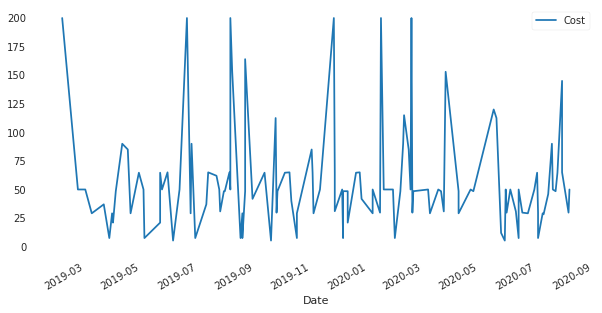

In [354]:
# 绘制折线图

space_missions.Cost.plot(figsize = (10,5),label = 'Cost') # 默认会将DataFrame的行索引作为X label
plt.legend()
plt.show()

In [355]:
data = [
            [2000, 3000000],
            [5000, 5000000]
        ]
 
df = pd.DataFrame(data = data, columns = ["Small", "Large"])
df

Small    Large
0   2000  3000000
1   5000  5000000

<AxesSubplot:>

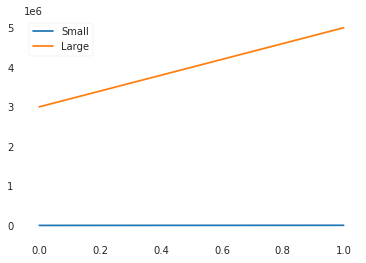

In [356]:
df.plot(kind='line') # 默认kind 取line，即绘制折线图
# 会将每一个数字列都绘制出来

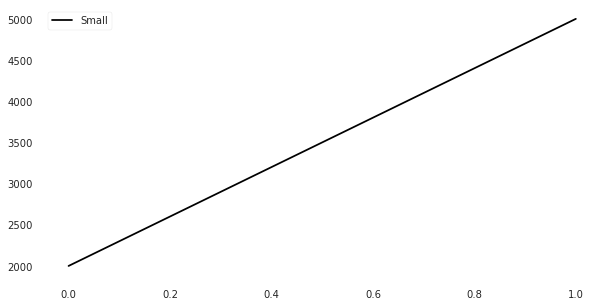

In [357]:
df.plot(
    y = 'Small' , # 指定绘制那一列
    kind='line',  # 图形类型
    figsize = (10,5), # 画布大小
    colormap = 'gray' # 设置颜色模式
)
plt.legend()
plt.show()

In [358]:
# 打印所有的颜色模式
plt.colormaps()  

['Accent',
 'Accent_r',
 'Blues',
 'Blues_r',
 'BrBG',
 'BrBG_r',
 'BuGn',
 'BuGn_r',
 'BuPu',
 'BuPu_r',
 'CMRmap',
 'CMRmap_r',
 'Dark2',
 'Dark2_r',
 'GnBu',
 'GnBu_r',
 'Greens',
 'Greens_r',
 'Greys',
 'Greys_r',
 'OrRd',
 'OrRd_r',
 'Oranges',
 'Oranges_r',
 'PRGn',
 'PRGn_r',
 'Paired',
 'Paired_r',
 'Pastel1',
 'Pastel1_r',
 'Pastel2',
 'Pastel2_r',
 'PiYG',
 'PiYG_r',
 'PuBu',
 'PuBuGn',
 'PuBuGn_r',
 'PuBu_r',
 'PuOr',
 'PuOr_r',
 'PuRd',
 'PuRd_r',
 'Purples',
 'Purples_r',
 'RdBu',
 'RdBu_r',
 'RdGy',
 'RdGy_r',
 'RdPu',
 'RdPu_r',
 'RdYlBu',
 'RdYlBu_r',
 'RdYlGn',
 'RdYlGn_r',
 'Reds',
 'Reds_r',
 'Set1',
 'Set1_r',
 'Set2',
 'Set2_r',
 'Set3',
 'Set3_r',
 'Spectral',
 'Spectral_r',
 'Wistia',
 'Wistia_r',
 'YlGn',
 'YlGnBu',
 'YlGnBu_r',
 'YlGn_r',
 'YlOrBr',
 'YlOrBr_r',
 'YlOrRd',
 'YlOrRd_r',
 'afmhot',
 'afmhot_r',
 'autumn',
 'autumn_r',
 'binary',
 'binary_r',
 'bone',
 'bone_r',
 'brg',
 'brg_r',
 'bwr',
 'bwr_r',
 'cividis',
 'cividis_r',
 'cool',
 'cool_r',
 'co

> ## 14.3  Bar Graphs  柱状图

In [359]:
space_missions.head()

Company Name Location    Cost   Status
Date                                             
2019-02-05  Arianespace   France  200.00  Success
2019-02-22       SpaceX      USA   50.00  Success
2019-03-02       SpaceX      USA   50.00  Success
2019-03-09         CASC    China   29.15  Success
2019-03-22  Arianespace   France   37.00  Success

In [360]:
space_missions['Company Name'].value_counts().to_frame()  # 每个公司的太空任务次数

Company Name
CASC                    35
SpaceX                  25
Roscosmos               12
Arianespace             10
Rocket Lab               9
...                    ...
MHI                      3
ExPace                   1
ILS                      1
Virgin Orbit             1
JAXA                     1

[14 rows x 1 columns]

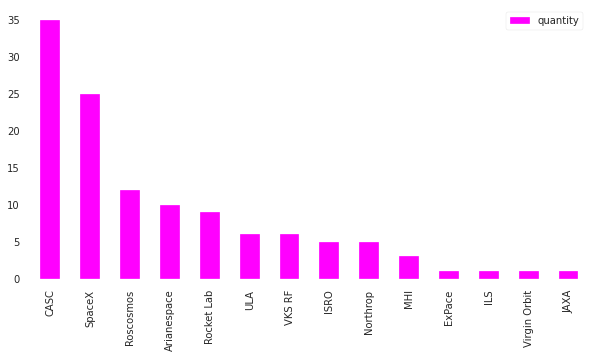

In [361]:
# 使用柱状图绘制
space_missions['Company Name'].value_counts().plot(
    figsize = (10,5),
    kind='bar',
    label = 'quantity',
    colormap = 'spring'# tab10 summer winter tab10_r rainbow spring
)
plt.legend()
plt.show()

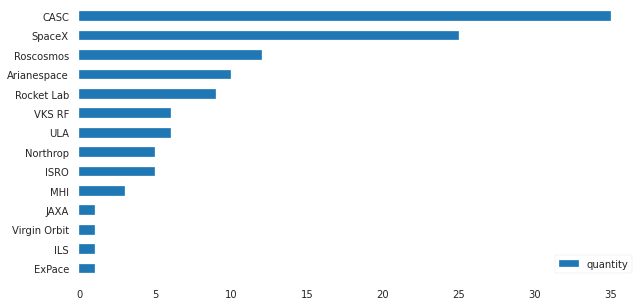

In [362]:
# 使用水平柱状图绘制
space_missions['Company Name'].value_counts().sort_values().plot( # 排序后再绘制
    figsize = (10,5),
    kind='barh',
    label = 'quantity'
)
plt.legend()
plt.show()

>## 14.4  Pie Charts
+ 饼状图

In [363]:
space_missions["Status"].value_counts().to_frame() # 发射状态统计

Status
Success     114
Failure       6

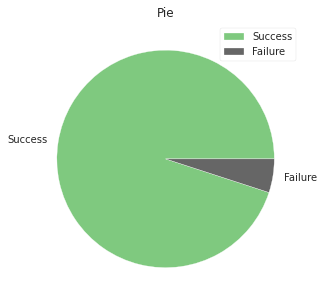

In [364]:
# 使用饼状图绘制
space_missions['Status'].value_counts().plot(
    figsize = (10,5),
    kind='pie',
    legend = True, # 是否显示图例
    title = 'Pie',
    ylabel = '',
    colormap = 'Accent' # 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twiligh
)
plt.show()

# Visualization with Matplotlib,Pandas and Seaborn
+ 来自 Pandas 1.x Cookbook(第二版)
+ 大部分可视化的时候使用pandas和seaborn
+ 非必须不用matplotlib

> github 地址：https://github.com/PacktPublishing/Pandas-Cookbook-Second-Edition

## matplotlib 部分

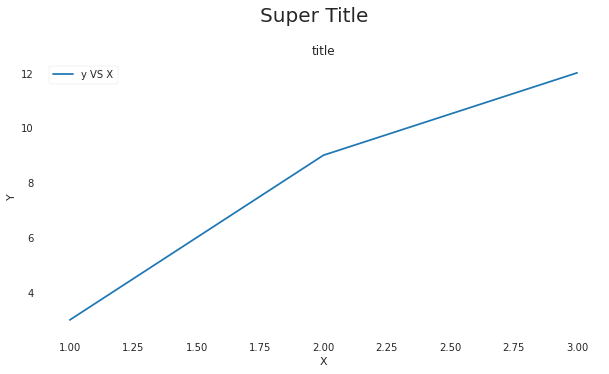

In [365]:
# 一般使用方法
fig = plt.figure(figsize=(10,5))
plt.plot([1,2,3],[3,9,12],label = 'y VS X')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('title')
plt.suptitle('Super Title',size = 20,y = 1.03) # y 设置y轴上的偏移量
plt.show()

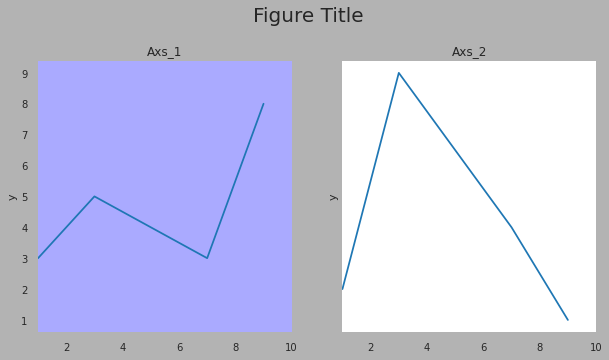

In [366]:
# 面向对象的使用方法，推荐使用这种方法

fig,Axs = plt.subplots(
    figsize = (10,5) # 设置画布大小
    ,nrows = 1,ncols = 2  # 设置子画布数量，行与列
    ,sharey= True   # 是否共享 y轴
    ,subplot_kw={ # 子画布参数设置,会同时设置所有的子图
        'ylabel':'y',
        'xlim':[1,10],
    }  
)

fig.set_facecolor('0.7')  #整个画布的背景色

# Axs 中保存着两个子图对象，是一个数组
Axs[0].set_title('Axs_1')  # 单独设置一个子图
Axs[0].plot([1,3,7,9],[3,5,3,8])
Axs[1].set_title('Axs_2')  # 单独设置另一个子图
Axs[1].plot([1,3,7,9],[2,9,4,1])
Axs[0].set_facecolor('#aaaaff')  # 设置子图的背景色
Axs[0].spines['top'].set_visible(False)  # 将子图上方的线条取消显示
Axs[0].spines['right'].set_visible(False)
fig.suptitle('Figure Title',size = 20,y = 1.03)
plt.show()

>## Plotting basics with pandas

In [367]:
df = pd.DataFrame(
index = ['Atiya','Abbas','Cornelia','Stephanie','Monte'],
    data = {
        'Apples':[20,10,40,20,50],
        'Oranges':[35,40,25,19,33]
    }
)
df

Apples  Oranges
Atiya          20       35
Abbas          10       40
Cornelia       40       25
Stephanie      20       19
Monte          50       33

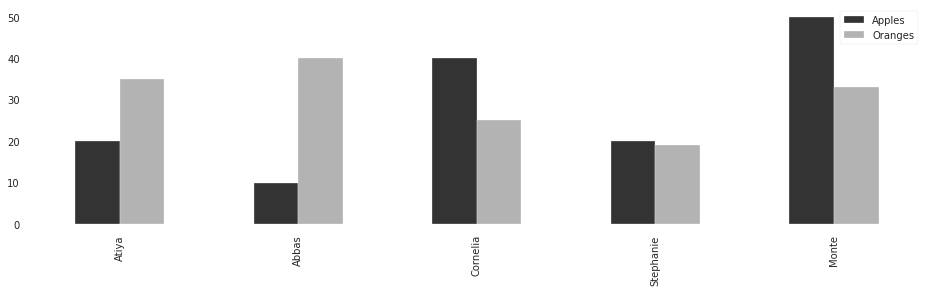

In [368]:
# 绘制柱状图
# DataFrame的标签将作为 画布的 X label

color = ['0.2','0.7']
ax = df.plot.bar(color = color,figsize = (16,4))

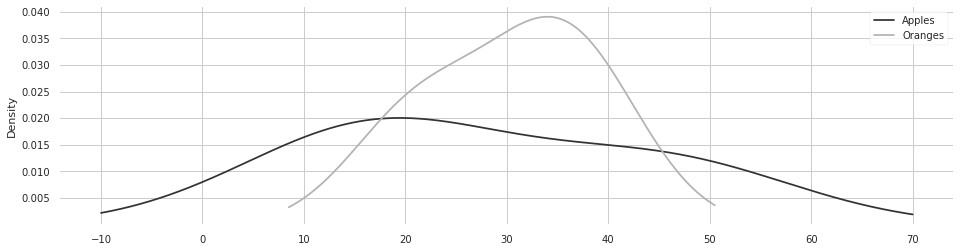

In [369]:
# KDE plot  密度图  (核密度估计(Kernel Density Estimates))

# 所谓核密度估计，就是采用平滑的峰值函数(“核”)来拟合观察到的数据点，从而对真实的概率分布曲线进行模拟,作用和直方图类似，是为了查看数据的分布。

# KDE plot 会忽略掉DataFrame的行索引，而是绘制各个列的密度分布图。

ax = df.plot(
    kind = 'kde'
    ,color = color
    ,figsize = (16,4)
    ,grid = True
)
ax.spines['left'].set_visible(True)

In [370]:
# 多个子图绘制在一起   折线图，散点图，柱状图

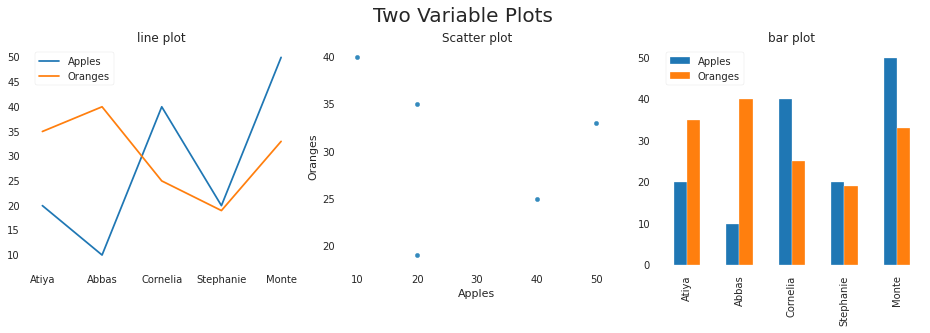

In [371]:
fig,(ax1,ax2,ax3) = plt.subplots(figsize = (16,4),nrows = 1,ncols = 3)
fig.suptitle('Two Variable Plots',size = 20,y = 1.02)

df.plot(
    ax = ax1 # 指定子图
    ,title = 'line plot'
)

df.plot(
    kind = 'scatter'
    ,ax = ax2
    ,title = 'Scatter plot'
    ,x = 'Apples' # 指定X轴的数据
    ,y = 'Oranges' # 指定y轴的数据
)

df.plot(
    kind = 'bar'
    ,ax = ax3
    ,title = 'bar plot'
)
fig.show()

In [372]:
# 多个子图绘制在一起   KED图，箱线图，直方图

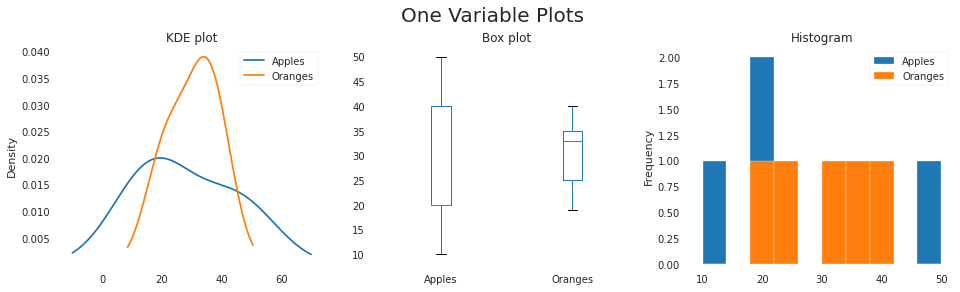

In [373]:
fig,(ax1,ax2,ax3) = plt.subplots(figsize = (16,4),nrows = 1,ncols = 3)
fig.suptitle('One Variable Plots',size = 20,y = 1.02)

df.plot(
    kind = 'kde'
    ,ax = ax1 
    ,title = 'KDE plot'
)

df.plot(
    kind = 'box'
    ,ax = ax2
    ,title = 'Box plot'
)

df.plot(
    kind = 'hist'
    ,ax = ax3
    ,title = 'Histogram'
)
fig.show()

## 实战 -- Visualizing the flights dataset

In [374]:
"""
diverted  --  改道
canceled  --  取消
delayed   --  延迟
ARR_DELAY  --  航班延迟时间
DIST  --  距离

"""
flights = pd.read_csv('../input/pandas-cookbook/data/flights.csv')
flights.head()

MONTH  DAY  WEEKDAY AIRLINE ORG_AIR  ...  DIST  SCHED_ARR  ARR_DELAY  \
0      1    1        4      WN     LAX  ...   590       1905       65.0   
1      1    1        4      UA     DEN  ...  1452       1333      -13.0   
2      1    1        4      MQ     DFW  ...   641       1453       35.0   
3      1    1        4      AA     DFW  ...  1192       1935       -7.0   
4      1    1        4      WN     LAX  ...  1363       2225       39.0   

   DIVERTED  CANCELLED  
0         0          0  
1         0          0  
2         0          0  
3         0          0  
4         0          0  

[5 rows x 14 columns]

In [375]:
# 统计一下  diverted（改道），canceled(取消)，delayed(延迟),ontime（准时）的航班数

# DIVERTED 这一列 可以很容易的统计出改道的航班数，其本省就是一个二分类的值
# 航班被认为延迟 --  只要比预定时间(scheduled) 时间晚15分钟或更长
# 创建两列记录航班是否延迟，是否准时到达

cols = ['DIVERTED','CANCELLED','DELAYED']

flights['DELAYED'] = (flights.ARR_DELAY >= 15).astype(int)
flights.head()

MONTH  DAY  WEEKDAY AIRLINE ORG_AIR  ... SCHED_ARR  ARR_DELAY  DIVERTED  \
0      1    1        4      WN     LAX  ...      1905       65.0         0   
1      1    1        4      UA     DEN  ...      1333      -13.0         0   
2      1    1        4      MQ     DFW  ...      1453       35.0         0   
3      1    1        4      AA     DFW  ...      1935       -7.0         0   
4      1    1        4      WN     LAX  ...      2225       39.0         0   

   CANCELLED  DELAYED  
0          0        1  
1          0        0  
2          0        1  
3          0        0  
4          0        1  

[5 rows x 15 columns]

In [376]:
flights[['DIVERTED','CANCELLED','DELAYED']].head() # 这是航班没有准时到达的三种情况

DIVERTED  CANCELLED  DELAYED
0         0          0        1
1         0          0        0
2         0          0        1
3         0          0        0
4         0          0        1

In [377]:
flights[cols].any(axis = 1).to_frame() # 只要这三列中有任何一个为1，则返回True，也就是没有准时到达

0
0       True
1      False
2       True
3      False
4       True
...      ...
58487  False
58488  False
58489  False
58490   True
58491  False

[58492 rows x 1 columns]

In [378]:
~flights[cols].any(axis = 1).to_frame()  # 取反，可以得到哪些行是准时到达的

0
0      False
1       True
2      False
3       True
4      False
...      ...
58487   True
58488   True
58489   True
58490  False
58491   True

[58492 rows x 1 columns]

In [379]:
# 增加一列 ON_TIME
flights['ON_TIME'] = ~flights[cols].any(axis = 1) # 或者也可以转化成整数
flights.head()

MONTH  DAY  WEEKDAY AIRLINE ORG_AIR  ... ARR_DELAY  DIVERTED  CANCELLED  \
0      1    1        4      WN     LAX  ...      65.0         0          0   
1      1    1        4      UA     DEN  ...     -13.0         0          0   
2      1    1        4      MQ     DFW  ...      35.0         0          0   
3      1    1        4      AA     DFW  ...      -7.0         0          0   
4      1    1        4      WN     LAX  ...      39.0         0          0   

   DELAYED  ON_TIME  
0        1    False  
1        0     True  
2        1    False  
3        0     True  
4        1    False  

[5 rows x 16 columns]

In [380]:
cols.append('ON_TIME')  # 不能多次执行
flights[cols].sum()

DIVERTED       137
CANCELLED      881
DELAYED      11685
ON_TIME      45789
dtype: int64

In [381]:
cols

['DIVERTED', 'CANCELLED', 'DELAYED', 'ON_TIME']

> ### 开始绘图

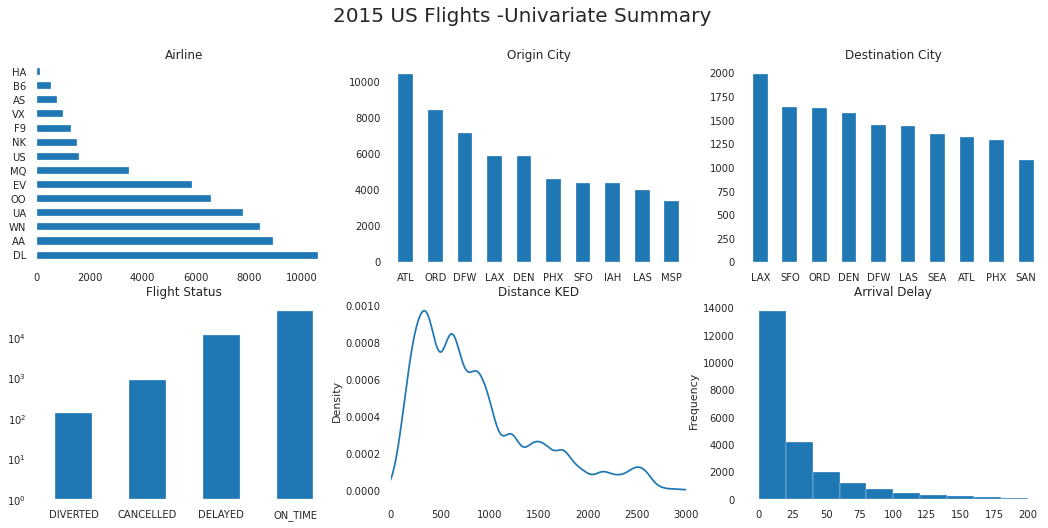

In [382]:
fig,ax_array = plt.subplots(nrows = 2,ncols = 3,figsize = (18,8))
(ax1,ax2,ax3),(ax4,ax5,ax6) = ax_array # 分配子图

fig.suptitle('2015 US Flights -Univariate Summary',size = 20)
ac = flights['AIRLINE'].value_counts()  # 统计各个航线数量
ac.plot(
    kind = 'barh'
    ,ax = ax1
    ,title = 'Airline'
)

flights['ORG_AIR'].value_counts().plot(  # 出发城市
    kind = 'bar'
    ,ax = ax2
    ,rot = 0
    ,title = 'Origin City'
)

flights['DEST_AIR'].value_counts().head(10).plot( # 目的地城市
    kind = 'bar'
    ,ax = ax3
    ,rot = 0
    ,title = 'Destination City'
)

flights[cols].sum().plot( # 航班状态： 改道，取消，延迟，准时
    kind = 'bar'
    ,ax = ax4
    ,rot = 0
    ,log = True  # 将轴的取值取对数，缩小值的范围，方便观察
    ,title = 'Flight Status'
)

flights['DIST'].plot(  # 距离密度图
    kind = 'kde'
    ,ax = ax5
    ,xlim =(0,3000)
    ,title = 'Distance KED'
)

flights['ARR_DELAY'].plot(  # 航班推迟时间的直方图
    kind = 'hist'
    ,ax = ax6
    ,title = 'Arrival Delay'
    ,range = (0,200)
)

fig.show()

In [383]:
flights.head()

MONTH  DAY  WEEKDAY AIRLINE ORG_AIR  ... ARR_DELAY  DIVERTED  CANCELLED  \
0      1    1        4      WN     LAX  ...      65.0         0          0   
1      1    1        4      UA     DEN  ...     -13.0         0          0   
2      1    1        4      MQ     DFW  ...      35.0         0          0   
3      1    1        4      AA     DFW  ...      -7.0         0          0   
4      1    1        4      WN     LAX  ...      39.0         0          0   

   DELAYED  ON_TIME  
0        1    False  
1        0     True  
2        1    False  
3        0     True  
4        1    False  

[5 rows x 16 columns]

># pandas_profiling 库
+ 可以显示DataFrame的所有详细概述报告

In [384]:
# 
pandas_profiling.ProfileReport(flights)

Summarize dataset:   0%|          | 0/30 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [385]:
pd.options.display.max_columns = 20
pd.options.display.max_colwidth = 20
flights.head()

MONTH  DAY  WEEKDAY AIRLINE ORG_AIR DEST_AIR  SCHED_DEP  DEP_DELAY  \
0      1    1        4      WN     LAX      SLC       1625       58.0   
1      1    1        4      UA     DEN      IAD        823        7.0   
2      1    1        4      MQ     DFW      VPS       1305       36.0   
3      1    1        4      AA     DFW      DCA       1555        7.0   
4      1    1        4      WN     LAX      MCI       1720       48.0   

   AIR_TIME  DIST  SCHED_ARR  ARR_DELAY  DIVERTED  CANCELLED  DELAYED  ON_TIME  
0      94.0   590       1905       65.0         0          0        1    False  
1     154.0  1452       1333      -13.0         0          0        0     True  
2      85.0   641       1453       35.0         0          0        1    False  
3     126.0  1192       1935       -7.0         0          0        0     True  
4     166.0  1363       2225       39.0         0          0        1    False

In [386]:
# 绘制每周航班数图，需要日期索引，但是DataFrame中并没有日期索引

# SCHED_DEP  -->  计划起飞时间  -> 从这个字段里可以拆解出小时与分钟
print(flights.SCHED_DEP.head()//100)  #-> 解析出小时
print(flights.SCHED_DEP.head()%100) #-> 解析出分钟

0    16
1     8
2    13
3    15
4    17
Name: SCHED_DEP, dtype: int64
0    25
1    23
2     5
3    55
4    20
Name: SCHED_DEP, dtype: int64


In [387]:
#有了年月日，小时和分钟，就可以使用pandas 的to_datetime 解析出时间戳

df_date = (
    flights[['MONTH','DAY']].assign( # 使用assign 函数向DataFrame增加列，不会改变原DataFrame，会返回一个新的DataFrame
        YEAR = 2015,
        HOUR = flights['SCHED_DEP'] //100,
        MINUTE = flights['SCHED_DEP'] % 100
    )
)
df_date.head()

MONTH  DAY  YEAR  HOUR  MINUTE
0      1    1  2015    16      25
1      1    1  2015     8      23
2      1    1  2015    13       5
3      1    1  2015    15      55
4      1    1  2015    17      20

In [388]:
flight_dep = pd.to_datetime(df_date)  # 得到航班的起飞时间
flight_dep.head().to_frame()

0
0 2015-01-01 16:25:00
1 2015-01-01 08:23:00
2 2015-01-01 13:05:00
3 2015-01-01 15:55:00
4 2015-01-01 17:20:00

In [389]:
# 将航班起飞时间作为索引
flights.set_index(keys=flight_dep,inplace=True)
flights.head()

MONTH  DAY  WEEKDAY AIRLINE ORG_AIR DEST_AIR  SCHED_DEP  \
2015-01-01 16:25:00      1    1        4      WN     LAX      SLC       1625   
2015-01-01 08:23:00      1    1        4      UA     DEN      IAD        823   
2015-01-01 13:05:00      1    1        4      MQ     DFW      VPS       1305   
2015-01-01 15:55:00      1    1        4      AA     DFW      DCA       1555   
2015-01-01 17:20:00      1    1        4      WN     LAX      MCI       1720   

                     DEP_DELAY  AIR_TIME  DIST  SCHED_ARR  ARR_DELAY  \
2015-01-01 16:25:00       58.0      94.0   590       1905       65.0   
2015-01-01 08:23:00        7.0     154.0  1452       1333      -13.0   
2015-01-01 13:05:00       36.0      85.0   641       1453       35.0   
2015-01-01 15:55:00        7.0     126.0  1192       1935       -7.0   
2015-01-01 17:20:00       48.0     166.0  1363       2225       39.0   

                     DIVERTED  CANCELLED  DELAYED  ON_TIME  
2015-01-01 16:25:00         0          0        1    False  
2015-01-01 08:23:00         0          0        0     True  
2015-01-01 13:05:00         0          0        1    False  
2015-01-01 15:55:00         0          0        0     True  
2015-01-01 17:20:00         0          0        1    False

In [390]:
#  统计每周航班数量
flights_perweek = flights.resample('W').count()
flights_perweek

MONTH   DAY  WEEKDAY  AIRLINE  ORG_AIR  DEST_AIR  SCHED_DEP  \
2015-01-04    666   666      666      666      666       666        666   
2015-01-11   1088  1088     1088     1088     1088      1088       1088   
2015-01-18   1120  1120     1120     1120     1120      1120       1120   
2015-01-25   1169  1169     1169     1169     1169      1169       1169   
2015-02-01   1103  1103     1103     1103     1103      1103       1103   
...           ...   ...      ...      ...      ...       ...        ...   
2015-12-06   1118  1118     1118     1118     1118      1118       1118   
2015-12-13   1132  1132     1132     1132     1132      1132       1132   
2015-12-20   1232  1232     1232     1232     1232      1232       1232   
2015-12-27   1142  1142     1142     1142     1142      1142       1142   
2016-01-03    674   674      674      674      674       674        674   

            DEP_DELAY  AIR_TIME  DIST  SCHED_ARR  ARR_DELAY  DIVERTED  \
2015-01-04        642       640   666        666        640       666   
2015-01-11       1060      1053  1088       1088       1053      1088   
2015-01-18       1113      1111  1120       1120       1111      1120   
2015-01-25       1164      1162  1169       1169       1162      1169   
2015-02-01       1045      1040  1103       1103       1040      1103   
...               ...       ...   ...        ...        ...       ...   
2015-12-06       1117      1114  1118       1118       1114      1118   
2015-12-13       1126      1124  1132       1132       1124      1132   
2015-12-20       1220      1216  1232       1232       1216      1232   
2015-12-27       1122      1117  1142       1142       1117      1142   
2016-01-03        634       631   674        674        631       674   

            CANCELLED  DELAYED  ON_TIME  
2015-01-04        666      666      666  
2015-01-11       1088     1088     1088  
2015-01-18       1120     1120     1120  
2015-01-25       1169     1169     1169  
2015-02-01       1103     1103     1103  
...               ...      ...      ...  
2015-12-06       1118     1118     1118  
2015-12-13       1132     1132     1132  
2015-12-20       1232     1232     1232  
2015-12-27       1142     1142     1142  
2016-01-03        674      674      674  

[53 rows x 16 columns]

In [391]:
flights_perweek = flights.resample('W').size()
flights_perweek

2015-01-04     666
2015-01-11    1088
2015-01-18    1120
2015-01-25    1169
2015-02-01    1103
              ... 
2015-12-06    1118
2015-12-13    1132
2015-12-20    1232
2015-12-27    1142
2016-01-03     674
Freq: W-SUN, Length: 53, dtype: int64

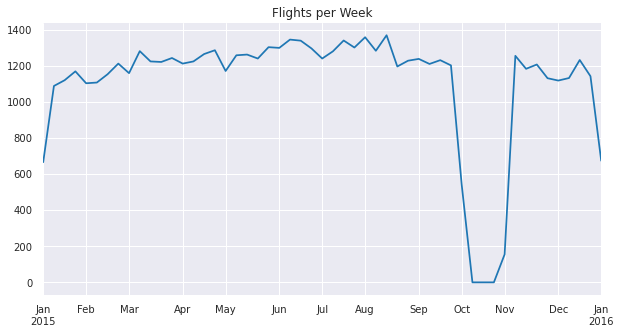

In [392]:
sns.set_style('darkgrid')
flights_perweek.plot(
    figsize = (10,5),
    kind = 'line',
    title = 'Flights per Week'
)
plt.show()
# 从图中可以分析出，似乎10月份缺少了数据，并且第一周与最后一周的航班数量较少（可能这两周的数据不全）

## pandas 填补缺失值的方法  interpolate
+ 插值函数

In [393]:
# 案例讲解
data = pd.DataFrame([[1,2,3,np.nan,6,6,np.nan],
                    [12,22,32,42,np.nan,62,np.nan],
                    [313,32,33,np.nan,np.nan,36,33]])
data

0   1   2     3    4   5     6
0    1   2   3   NaN  6.0   6   NaN
1   12  22  32  42.0  NaN  62   NaN
2  313  32  33   NaN  NaN  36  33.0

In [394]:
data.interpolate(limit_direction='both')

0   1   2     3    4   5     6
0    1   2   3  42.0  6.0   6  33.0
1   12  22  32  42.0  6.0  62  33.0
2  313  32  33  42.0  6.0  36  33.0

In [395]:
flights_perweek.where(flights_perweek>600).isnull().sum() # where 函数中只有一个条件，如果条件不满足默认填充NaN

5

In [396]:
data = flights_perweek.where(flights_perweek > 600).interpolate(limit_direction='both') # 将5个小于600的NaN进行差值填充

<AxesSubplot:>

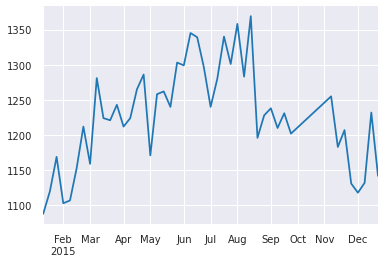

In [397]:
data[1:-1].plot(kind = 'line') # 去掉首尾两周

In [398]:
flights.head()

MONTH  DAY  WEEKDAY AIRLINE ORG_AIR DEST_AIR  SCHED_DEP  \
2015-01-01 16:25:00      1    1        4      WN     LAX      SLC       1625   
2015-01-01 08:23:00      1    1        4      UA     DEN      IAD        823   
2015-01-01 13:05:00      1    1        4      MQ     DFW      VPS       1305   
2015-01-01 15:55:00      1    1        4      AA     DFW      DCA       1555   
2015-01-01 17:20:00      1    1        4      WN     LAX      MCI       1720   

                     DEP_DELAY  AIR_TIME  DIST  SCHED_ARR  ARR_DELAY  \
2015-01-01 16:25:00       58.0      94.0   590       1905       65.0   
2015-01-01 08:23:00        7.0     154.0  1452       1333      -13.0   
2015-01-01 13:05:00       36.0      85.0   641       1453       35.0   
2015-01-01 15:55:00        7.0     126.0  1192       1935       -7.0   
2015-01-01 17:20:00       48.0     166.0  1363       2225       39.0   

                     DIVERTED  CANCELLED  DELAYED  ON_TIME  
2015-01-01 16:25:00         0          0        1    False  
2015-01-01 08:23:00         0          0        0     True  
2015-01-01 13:05:00         0          0        1    False  
2015-01-01 15:55:00         0          0        0     True  
2015-01-01 17:20:00         0          0        1    False

## 找出平均距离最长的10个入境航班

In [399]:
# DEST_AIR  -> 入境航班
flights.groupby('DEST_AIR')